In [ ]:
install.packages("WallomicsData")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:

if (!requireNamespace("BiocManager", quietly = TRUE))
    install.packages("BiocManager")
BiocManager::install("BiocParallel")

BiocManager::install('mixOmics')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    CRAN: https://cran.rstudio.com

Bioconductor version 3.17 (BiocManager 1.30.20), R 4.3.0 (2023-04-21)

Installing package(s) 'BiocVersion', 'BiocParallel'

also installing the dependencies ‘formatR’, ‘lambda.r’, ‘futile.options’, ‘futile.logger’, ‘snow’, ‘BH’


Old packages: 'bit', 'bslib', 'cachem', 'devtools', 'digest', 'dplyr',
  'evaluate', 'fontawesome', 'fs', 'gargle', 'gert', 'highr', 'httr', 'httr2',
  'isoband', 'jsonlite', 'pkgload', 'processx', 'ps', 'rlang', 'roxygen2',
  'sass', 'stringr', 'testthat', 'tidyverse', 'tinytex', 'vctrs',
  'viridisLite', 'vroom', 'waldo', 'whisker', 'xfun', 'xml2', 'zip', 'boot',
  'class', 'foreign', 'KernSmooth', 'MASS', 'nnet'

'getOption("repos")' replaces Bioconductor standard repositories, see
'hel

In [ ]:
# Charger les packages

library(mixOmics)

Loading required package: MASS

Loading required package: lattice

Loading required package: ggplot2


Loaded mixOmics 6.24.0
Thank you for using mixOmics!
Tutorials: http://mixomics.org
Bookdown vignette: https://mixomicsteam.github.io/Bookdown
Questions, issues: Follow the prompts at http://mixomics.org/contact-us
Cite us:  citation('mixOmics')




In [ ]:
library(WallomicsData)

In [ ]:
install.packages("glmnet")
library(glmnet)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘iterators’, ‘foreach’, ‘shape’


Loading required package: Matrix

Loaded glmnet 4.1-7



In [ ]:
library("matrixStats")

In [ ]:
data("Altitude_Cluster")
data("Ecotype")
data("Genetic_Cluster")
data("Metabolomics_Rosettes")
data("Metabolomics_Stems")
data("Metadata")
data("Phenomics_Rosettes")
data("Phenomics_Stems")
data("Proteomics_Rosettes_CW")
data("Proteomics_Stems_CW")
data("Transcriptomics_Rosettes")
data("Transcriptomics_Rosettes_CW")
data("Transcriptomics_Stems")
data("Transcriptomics_Stems_CW")


#univariate analysis ROSETTE Altitude_Cluster

###Exploratory Data Analysis:
handleing missing values in each data frame using median imputation

In [ ]:
for(i in 1:ncol(Metabolomics_Rosettes)){Metabolomics_Rosettes[,i][is.na(Metabolomics_Rosettes[,i])]<-median(Metabolomics_Rosettes[,i],na.rm=TRUE)}

for(i in 1:ncol(Phenomics_Rosettes)){Phenomics_Rosettes[,i][is.na(Phenomics_Rosettes[,i])]<-median(Phenomics_Rosettes[,i],na.rm=TRUE)}

for(i in 1:ncol(Proteomics_Rosettes_CW)){Proteomics_Rosettes_CW[,i][is.na(Proteomics_Rosettes_CW[,i])]<-median(Proteomics_Rosettes_CW[,i],na.rm=TRUE)}

for(i in 1:ncol(Transcriptomics_Rosettes)){Transcriptomics_Rosettes[,i][is.na(Transcriptomics_Rosettes[,i])]<-median(Transcriptomics_Rosettes[,i],na.rm=TRUE)}

for(i in 1:ncol(Transcriptomics_Rosettes_CW)){Transcriptomics_Rosettes_CW[,i][is.na(Transcriptomics_Rosettes_CW[,i])]<-median(Transcriptomics_Rosettes_CW[,i],na.rm=TRUE)}


###handling nonzero 
cause it cause problem in diablo WITH TRANSCRIPTOMICS

In [ ]:
my_nearZeroVar<-nearZeroVar(Transcriptomics_Rosettes)
#head(my_nearZeroVar$Metrics)
Transcriptomics_Rosettes <- Transcriptomics_Rosettes[,-which(colnames(Transcriptomics_Rosettes)%in%rownames(my_nearZeroVar$Metrics))]


###feature selection

Warning message in lognet(xd, is.sparse, ix, jx, y, weights, offset, alpha, nobs, :
“one multinomial or binomial class has fewer than 8  observations; dangerous ground”
Warning message in lognet(xd, is.sparse, ix, jx, y, weights, offset, alpha, nobs, :
“one multinomial or binomial class has fewer than 8  observations; dangerous ground”
Warning message in lognet(xd, is.sparse, ix, jx, y, weights, offset, alpha, nobs, :
“one multinomial or binomial class has fewer than 8  observations; dangerous ground”
Warning message in lognet(xd, is.sparse, ix, jx, y, weights, offset, alpha, nobs, :
“one multinomial or binomial class has fewer than 8  observations; dangerous ground”
Warning message in lognet(xd, is.sparse, ix, jx, y, weights, offset, alpha, nobs, :
“one multinomial or binomial class has fewer than 8  observations; dangerous ground”
Warning message in lognet(xd, is.sparse, ix, jx, y, weights, offset, alpha, nobs, :
“one multinomial or binomial class has fewer than 8  observations; dang

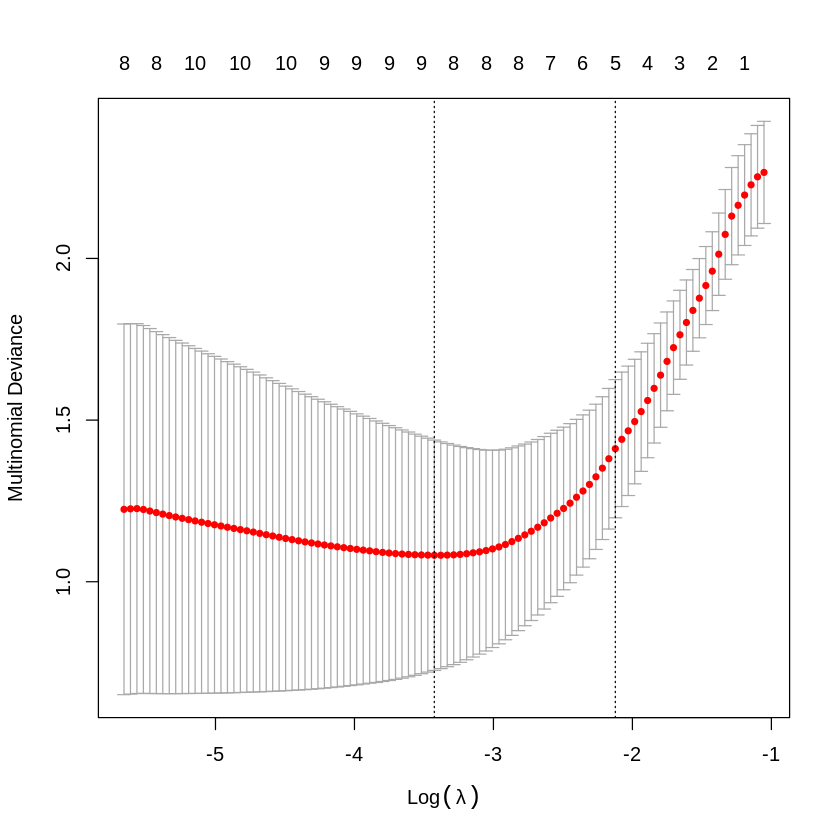

In [ ]:
#Proteomics_Rosettes_CW
lasso_fit <- cv.glmnet(as.matrix(Proteomics_Rosettes_CW), Altitude_Cluster, family="multinomial", alpha=1)
plot(lasso_fit)

In [ ]:

coef<-predict(lasso_fit, s = "lambda.min", type = "nonzero")
features<-colnames(Proteomics_Rosettes_CW)[unlist(coef)]
Proteomics_Rosettes_CW<-subset(Proteomics_Rosettes_CW, select = as.character(features))

#here we can't have df with var name and score cause it's multinomial but these colnames are enough to subset are data set with only informative vars

Warning message in lognet(xd, is.sparse, ix, jx, y, weights, offset, alpha, nobs, :
“one multinomial or binomial class has fewer than 8  observations; dangerous ground”
Warning message in lognet(xd, is.sparse, ix, jx, y, weights, offset, alpha, nobs, :
“one multinomial or binomial class has fewer than 8  observations; dangerous ground”
Warning message in lognet(xd, is.sparse, ix, jx, y, weights, offset, alpha, nobs, :
“one multinomial or binomial class has fewer than 8  observations; dangerous ground”
Warning message in lognet(xd, is.sparse, ix, jx, y, weights, offset, alpha, nobs, :
“one multinomial or binomial class has fewer than 8  observations; dangerous ground”
Warning message in lognet(xd, is.sparse, ix, jx, y, weights, offset, alpha, nobs, :
“one multinomial or binomial class has fewer than 8  observations; dangerous ground”
Warning message in lognet(xd, is.sparse, ix, jx, y, weights, offset, alpha, nobs, :
“one multinomial or binomial class has fewer than 8  observations; dang

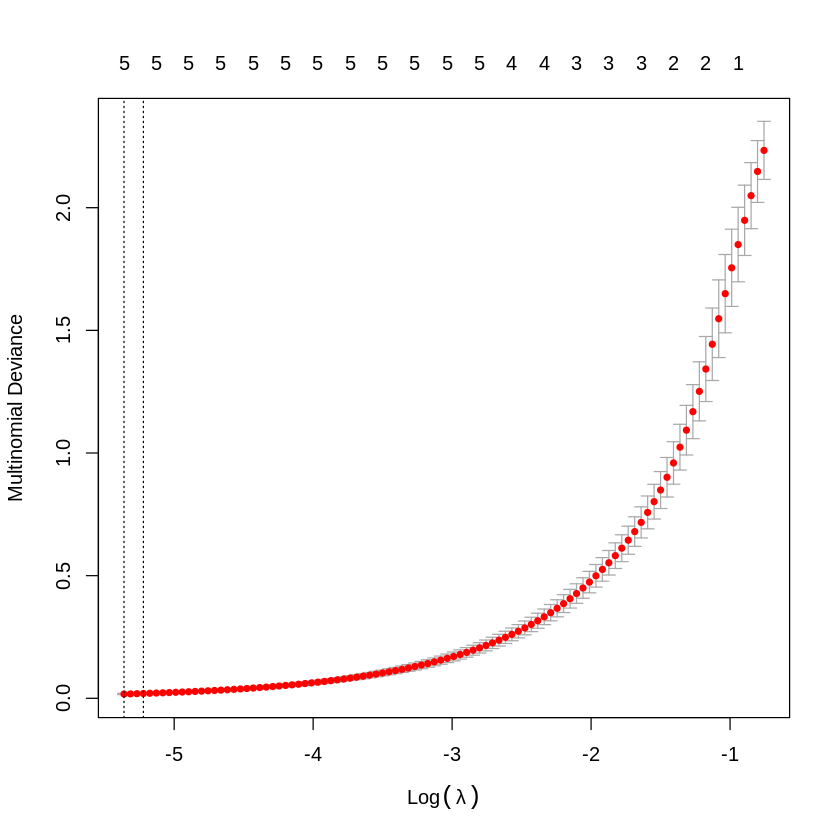

In [ ]:
#Transcriptomics_Rosettes
lasso_fit <- cv.glmnet(as.matrix(Transcriptomics_Rosettes), Altitude_Cluster, family="multinomial", alpha=1)
plot(lasso_fit)

In [ ]:

coef<-predict(lasso_fit, s = "lambda.min", type = "nonzero")
features<-colnames(Transcriptomics_Rosettes)[unlist(coef)]
Transcriptomics_Rosettes<-subset(Transcriptomics_Rosettes, select = as.character(features))

#here we can't have df with var name and score cause it's multinomial but these colnames are enough to subset are data set with only informative vars

Warning message in lognet(xd, is.sparse, ix, jx, y, weights, offset, alpha, nobs, :
“one multinomial or binomial class has fewer than 8  observations; dangerous ground”
Warning message in lognet(xd, is.sparse, ix, jx, y, weights, offset, alpha, nobs, :
“one multinomial or binomial class has fewer than 8  observations; dangerous ground”
Warning message in lognet(xd, is.sparse, ix, jx, y, weights, offset, alpha, nobs, :
“one multinomial or binomial class has fewer than 8  observations; dangerous ground”
Warning message in lognet(xd, is.sparse, ix, jx, y, weights, offset, alpha, nobs, :
“one multinomial or binomial class has fewer than 8  observations; dangerous ground”
Warning message in lognet(xd, is.sparse, ix, jx, y, weights, offset, alpha, nobs, :
“one multinomial or binomial class has fewer than 8  observations; dangerous ground”
Warning message in lognet(xd, is.sparse, ix, jx, y, weights, offset, alpha, nobs, :
“one multinomial or binomial class has fewer than 8  observations; dang

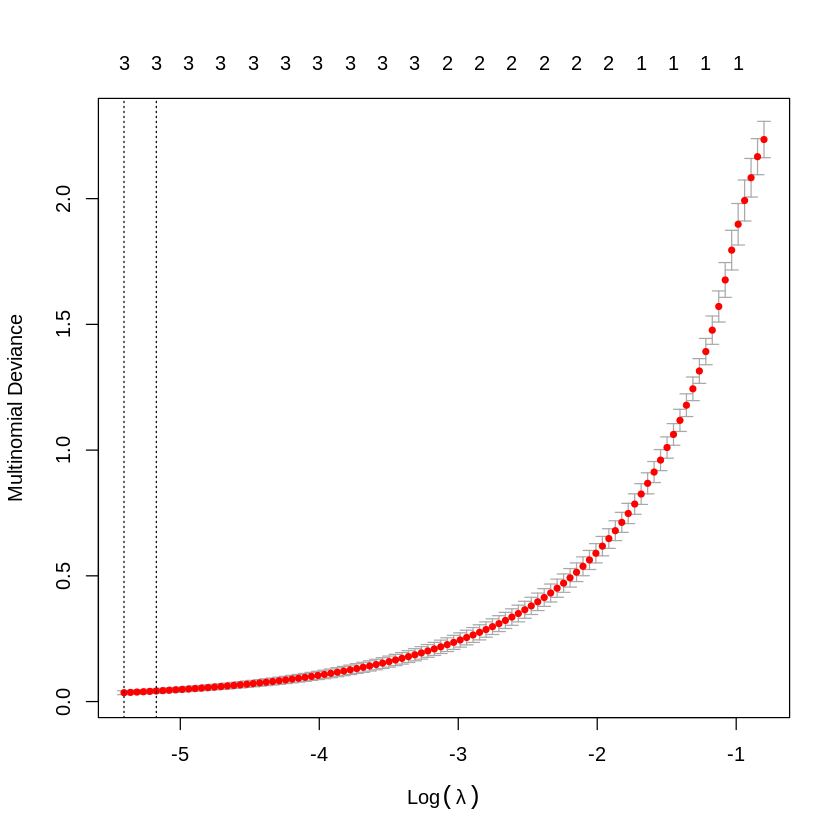

In [ ]:
#Transcriptomics_Rosettes_CW
lasso_fit <- cv.glmnet(as.matrix(Transcriptomics_Rosettes_CW), Altitude_Cluster, family="multinomial", alpha=1)
plot(lasso_fit)

In [ ]:

coef<-predict(lasso_fit, s = "lambda.min", type = "nonzero")
features<-colnames(Transcriptomics_Rosettes_CW)[unlist(coef)]
Transcriptomics_Rosettes_CW<-subset(Transcriptomics_Rosettes_CW, select = as.character(features))

#here we can't have df with var name and score cause it's multinomial and dufficult but these colnames are enough to subset are data set with only informative vars

In [ ]:
dim(Transcriptomics_Rosettes_CW)
dim(Transcriptomics_Rosettes)
dim(Proteomics_Rosettes_CW)

[1] 30 15

[1] 30 19

[1] 30 24

###PCA analysis:

**Metabolomics_Rosettes:**

,Pectin_RGI,Pectin_HG,XG,Pectin_linearity,Contribution_RG,RGI_branching
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Col.22.1,75.95791,60.28917,92.87987,0.9402467,0.2876133,2.697849
Col.22.2,63.70577,76.67599,89.75543,1.3244072,0.1683510,3.485004
Col.22.3,69.04940,78.73487,103.19934,1.2785566,0.1996149,2.918205
Col.15.1,57.55757,43.65080,81.75463,0.8494954,0.1979410,4.947072
Col.15.2,79.39145,74.33798,116.75840,1.0278840,0.1643535,4.919391
Col.15.3,84.35585,73.30991,123.26794,0.9566913,0.1690592,5.182858


      PC1       PC2       PC3       PC4 
0.4375291 0.8180822 0.9684057 0.9981591 


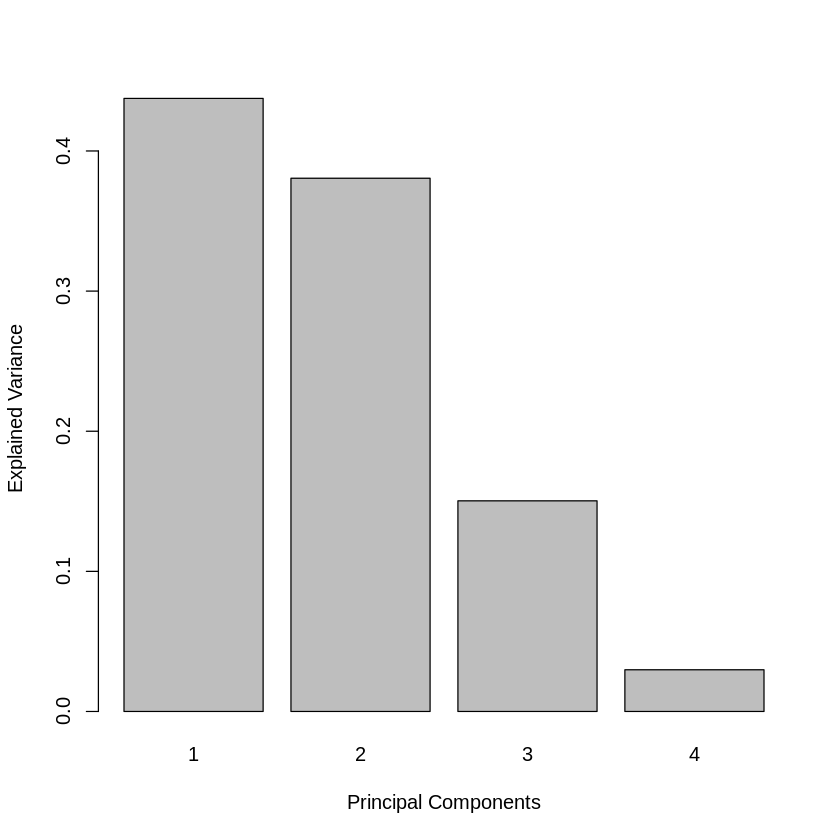

In [ ]:
#Metabolomics_Rosettes
data("Metabolomics_Rosettes")
x<-Metabolomics_Rosettes
#rownames(x)<-NULL
head(x)
pca_meta_ros<- tune.pca(x, ncomp = 4,center = TRUE, scale = TRUE)
plot(pca_meta_ros)
print(pca_meta_ros$cum.var)       # Outputs cumulative proportion of variance we see ythat the first 2 comp explains 0.81 of the variance then we only n=use them

we observe that the first two principal components explain 82% of the total variance, and the first three principal components explain 96% of the total variance. The rule of thumb for choosing the number of components is not so much to set a hard threshold based on the cumulative proportion of explained variance thus taking 2 comp is enough for our final pca

In [ ]:
# from above we see that cmp1 and cmp2 explains 0.93 of the total variance gence we only use those
final_pca_meta_ros <- pca(x, ncomp = 2, center = TRUE, scale = TRUE)
#final_pca_Metabo_stm  # Lists possible outputs
print(final_pca_meta_ros$var.tot)
print(final_pca_meta_ros$prop_expl_var$X)

[1] 6
      PC1       PC2 
0.4375291 0.3805531 


In [ ]:
head(selectVar(final_pca_meta_ros, comp = 1)$value)

,value.var
,<dbl>
RGI_branching,-0.604496206
Pectin_linearity,0.479998269
Contribution_RG,0.469044756
XG,-0.348447872
Pectin_HG,0.250407358
Pectin_RGI,0.007953045


Identify the informative variables

Top variables on the first component only:

Here the variables are not selected (all are included), but ranked according to their importance in defining each component.

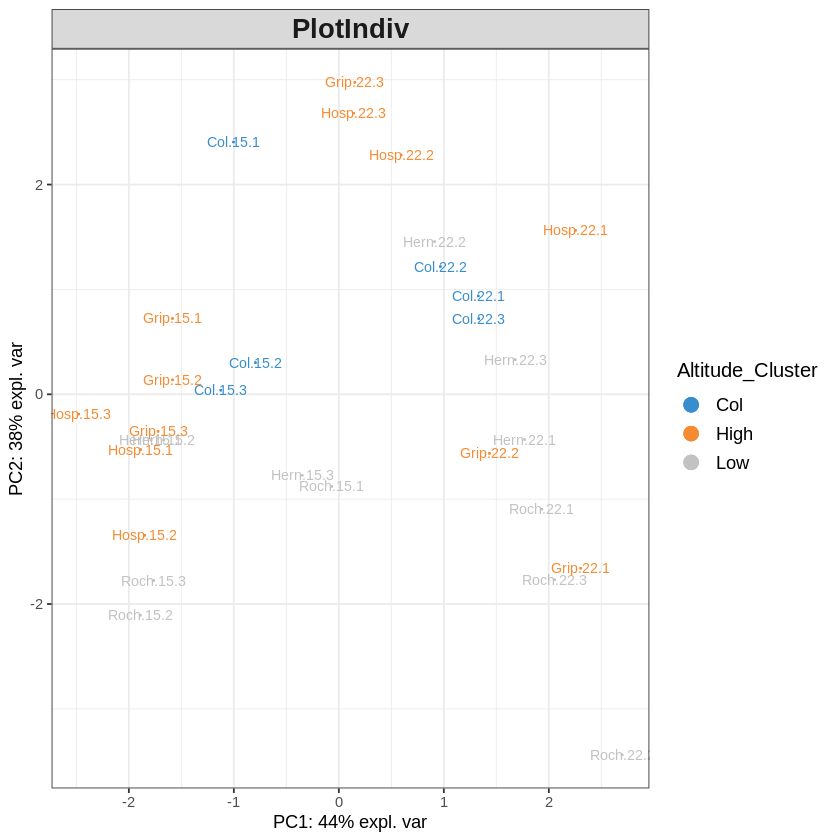

In [ ]:
data("Altitude_Cluster") # we're using this to groupe we can use also temperatures
# Interactive 3D plot will load the rgl library.
plotIndiv(final_pca_meta_ros,
          comp = c(1, 2),   # Specify components to plot
          ind.names = TRUE, # Show row names of samples
          group = Altitude_Cluster,
          #title = 'Metabolomics_Rosettes grouped by Altitude_Cluster',
          legend = TRUE, legend.title = 'Altitude_Cluster'
          )
#the points you see in the plot are sample code (row names col.x.x grep.x.x and they represent Altitude_Cluster from this we understand that using eco type to grp was a good choice )

Metabolomics Rosette Samples are projected into the space spanned by the first two principal components, and coloured according to allttude cluster the codes indicate the rownames of the data

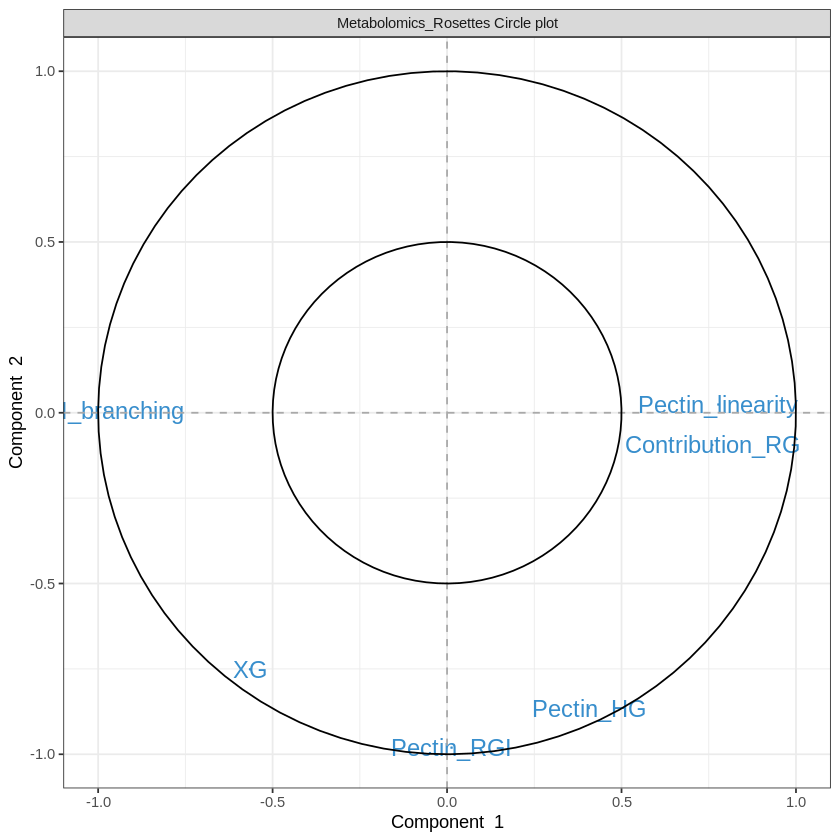

In [ ]:
# Variable plot: correlation circle plot

plotVar(final_pca_meta_ros, comp = c(1,2),
        var.names = TRUE,
        cex = 5,         # To change the font size
        # cutoff = 0.5,  # For further cutoff
        title = 'Metabolomics_Rosettes Circle plot')


Correlation Circle plot from the PCA performed on the metabolomics data. The plot shows variable that contribute to PCs and how they contribute
rgl_branching contribute negativly to PC1 and 0 contribution to PC2 same as pectin_linearity and contibution_rg the only diffrence is that they contribute positivly on PC1

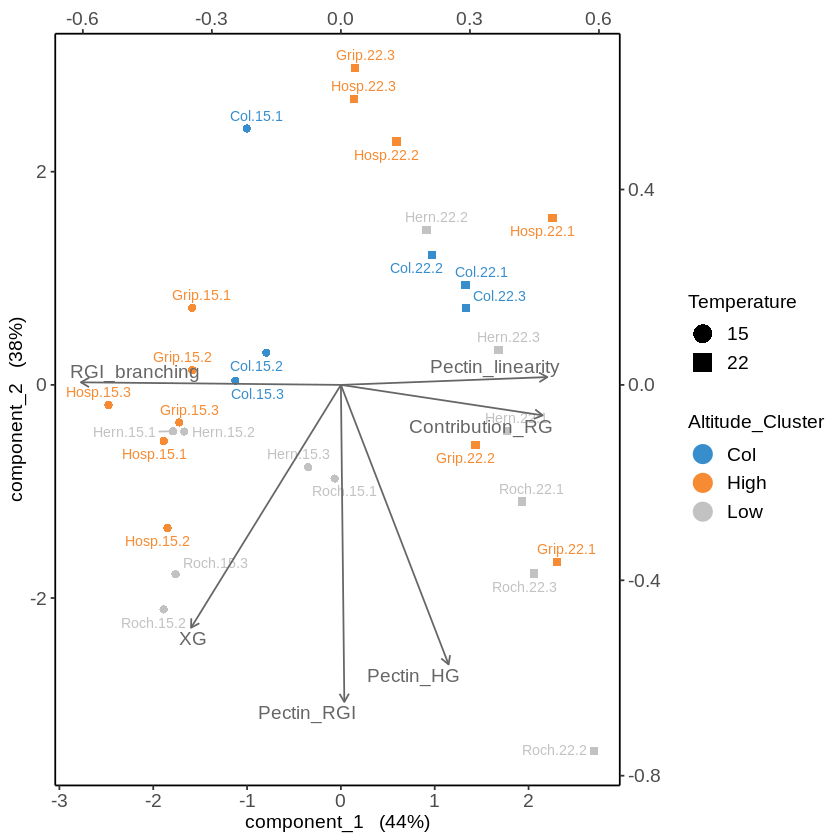

In [ ]:
#Biplot: samples and variables
biplot(final_pca_meta_ros, group = Altitude_Cluster, legend.title = 'Altitude_Cluster',pch = Temperature,legend.title.pch="Temperatue")

#the points you see in the plot are sample code (row names col.x.x grep.x.x and they represent Altitude_Cluster from this we understand that using eco type to grp was a good choice )

This plot can indicate what variables are responsible for explaining distibution in the sample values. A variable vector that points towards a set of certain points can provide information on what caused the clustering of those points. For example, ,pectin_rgi and pectin_hg points to nothing so we can say that they not informative of our samples .

**Phenomics_Rosettes:**

      PC1       PC2       PC3       PC4       PC5 
0.6057165 0.9392294 0.9761129 0.9993821 1.0000000 


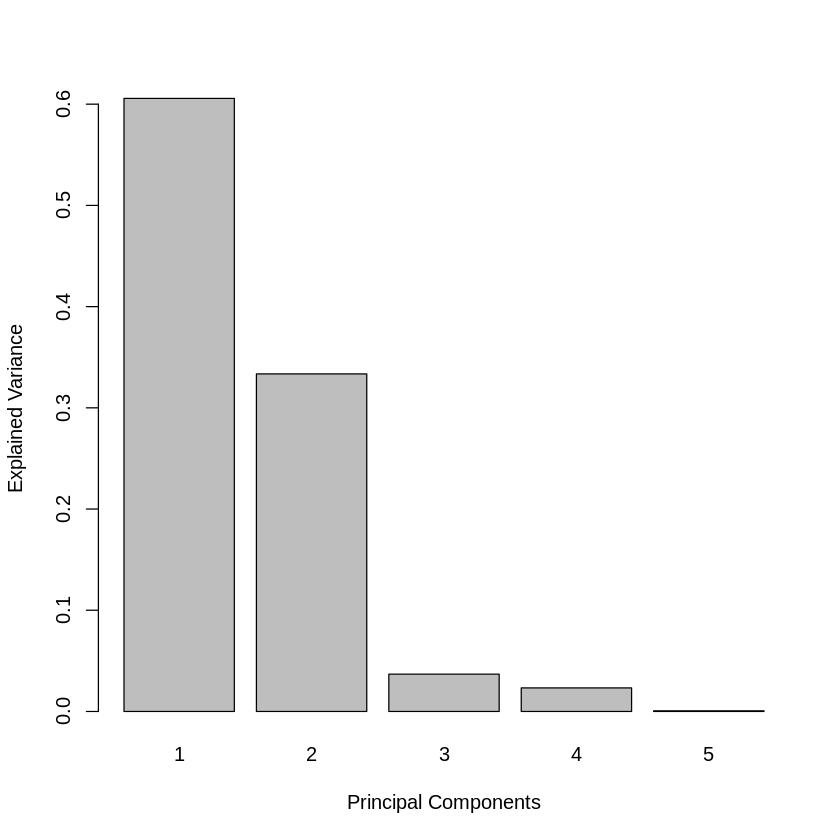

In [ ]:
x<-Phenomics_Rosettes
tune_pca_Phenomics_Rosettes <- tune.pca(x, ncomp = 5, scale = TRUE)
plot(tune_pca_Phenomics_Rosettes)
print(tune_pca_Phenomics_Rosettes$cum.var)  

we observe that the first two principal components explain 93% of the total variance, The rule of thumb for choosing the number of components is not so much to set a hard threshold based on the cumulative proportion of explained variance thus taking 2 comp is enough for our final pca

In [ ]:
# from above we see that cmp1 and cmp2 explains 0.93 of the total variance gence we only use those
final_pca_Phenomics_Rosettes <- pca(x, ncomp = 2, center = TRUE, scale = TRUE)
#final_pca_Metabo_stm  # Lists possible outputs
print(final_pca_Phenomics_Rosettes$var.tot)
print(final_pca_Phenomics_Rosettes$prop_expl_var$X)

[1] 5
      PC1       PC2 
0.6057165 0.3335130 


Identify the informative variables

Top variables on the first component only:

Here the variables are not selected (all are included), but ranked according to their importance in defining each component.

In [ ]:
#idnetifying the informative variables
# Top variables on the first component only:
head(selectVar(final_pca_Phenomics_Rosettes, comp = 1)$value)

,value.var
,<dbl>
Mass,0.5422527
Leaves_number,0.5420844
Density,0.5145020
Area,0.3669076
Diameter,-0.1130175


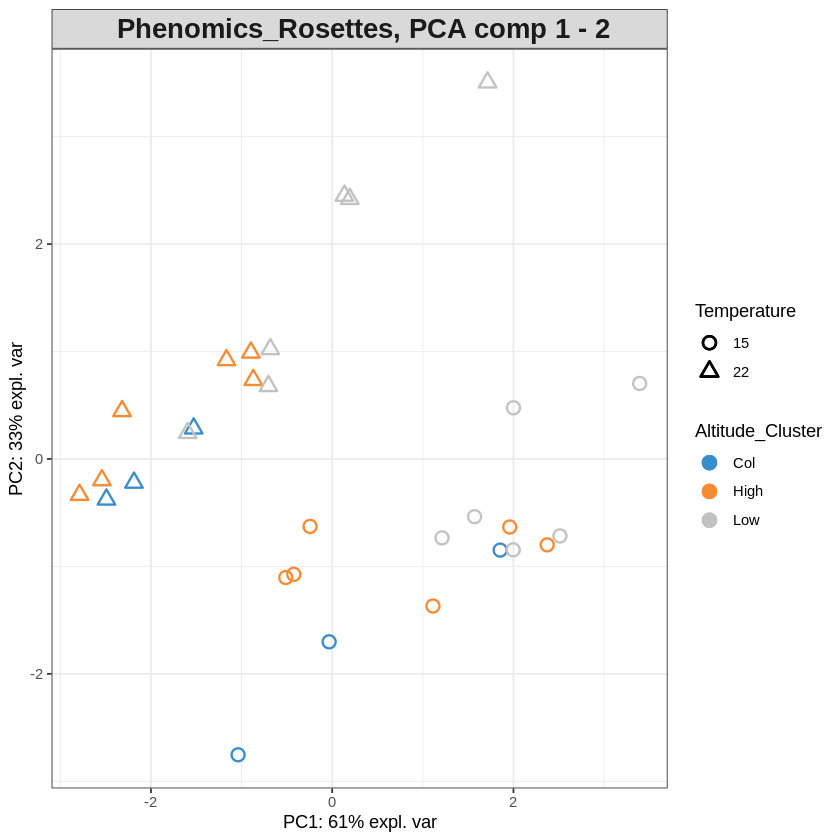

In [ ]:
#sample plots
plotIndiv(final_pca_Phenomics_Rosettes,
          comp = c(1, 2),   # Specify components to plot
          ind.names = TRUE, # Show row names of samples
          group=Altitude_Cluster,
          pch=Temperature,
          title = ' Phenomics_Rosettes, PCA comp 1 - 2',
          legend = TRUE, 
          legend.title = 'Altitude_Cluster',
          legend.title.pch = 'Temperature')

phenomics Rosette Samples are projected into the space spanned by the first two principal components, and coloured according to allttude cluster and shapes according to temperature 

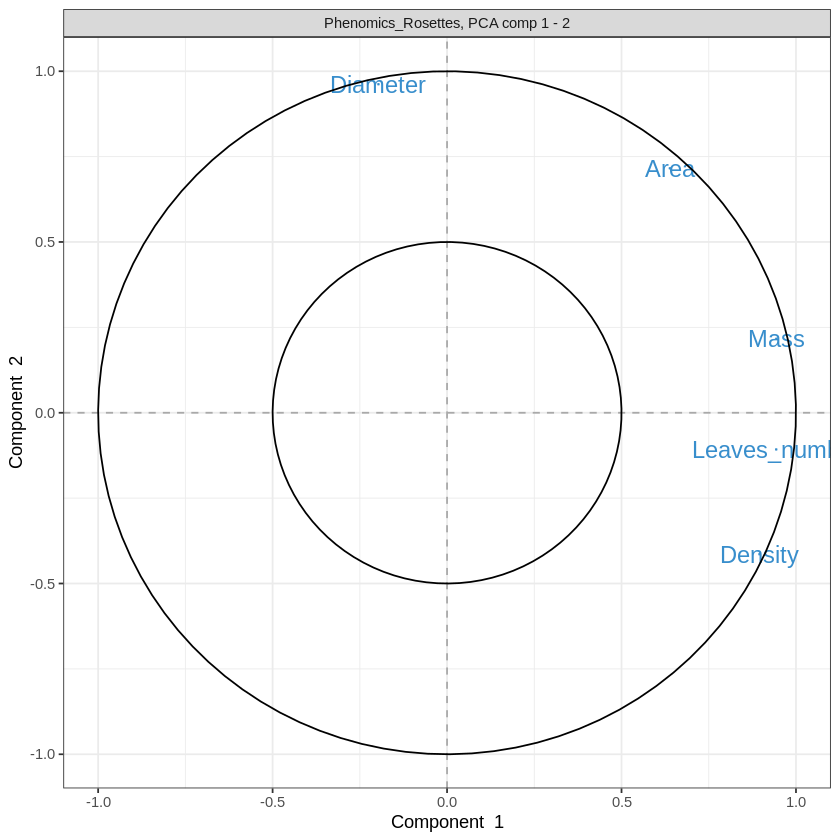

In [ ]:
#variable plot /correlation plot
plotVar(final_pca_Phenomics_Rosettes, comp = c(1, 2),
        var.names = TRUE,
        cex = 5,         # To change the font size
        # cutoff = 0.5,  # For further cutoff
        title = 'Phenomics_Rosettes, PCA comp 1 - 2')

Correlation Circle plot from the PCA performed on the phenomics data. The plot shows variable that contribute to PCs and how they contribute

dimater positive on PC2 and negative on PC1

Area and mass positive on on both PCs

leaves_num positive on PC1 and negative on PC2 

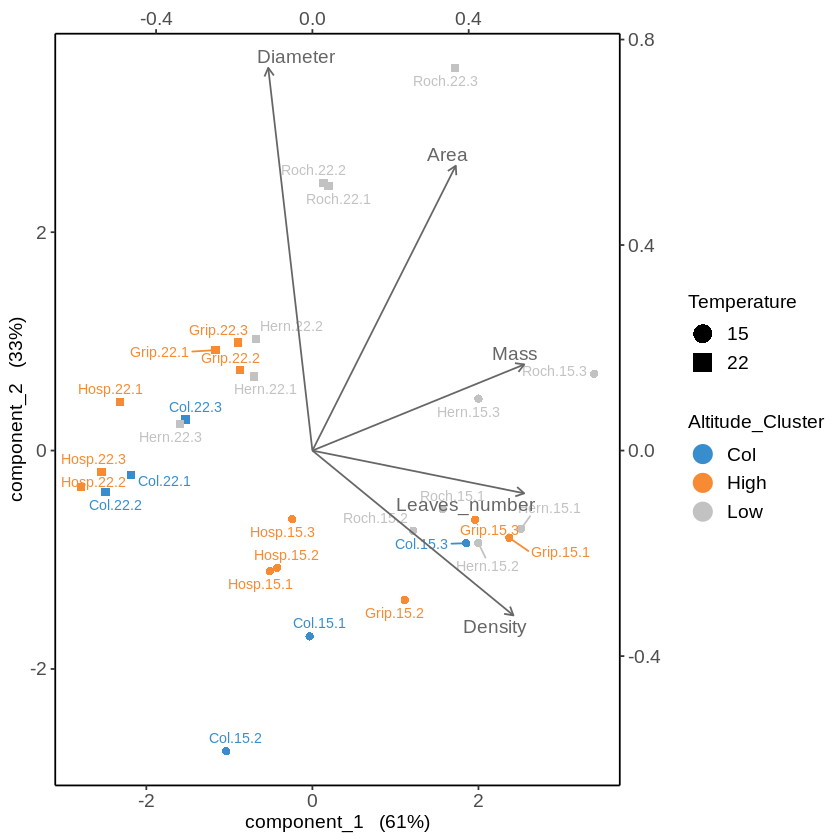

In [ ]:
#Biplot samples and variables 
biplot(final_pca_Phenomics_Rosettes,
        group = Altitude_Cluster ,
        pch = Temperature, 
       legend.title = 'Altitude_Cluster',
       legend.title.pch="Temperatue")

This plot can indicate what variables are responsible for explaining distibution in the sample values. A variable vector that points towards a set of certain points can provide information on what caused the clustering of those points. For example, leave_number is the only variable pointing to sub cluster of samples 

**Proteomics_Rosettes_CW:**

      PC1       PC2       PC3       PC4       PC5       PC6       PC7       PC8 
0.2653981 0.4224675 0.5456248 0.6416732 0.7170147 0.7783148 0.8215162 0.8521093 
      PC9      PC10      PC11      PC12      PC13      PC14      PC15 
0.8797028 0.9032090 0.9211039 0.9381950 0.9504376 0.9619226 0.9725828 


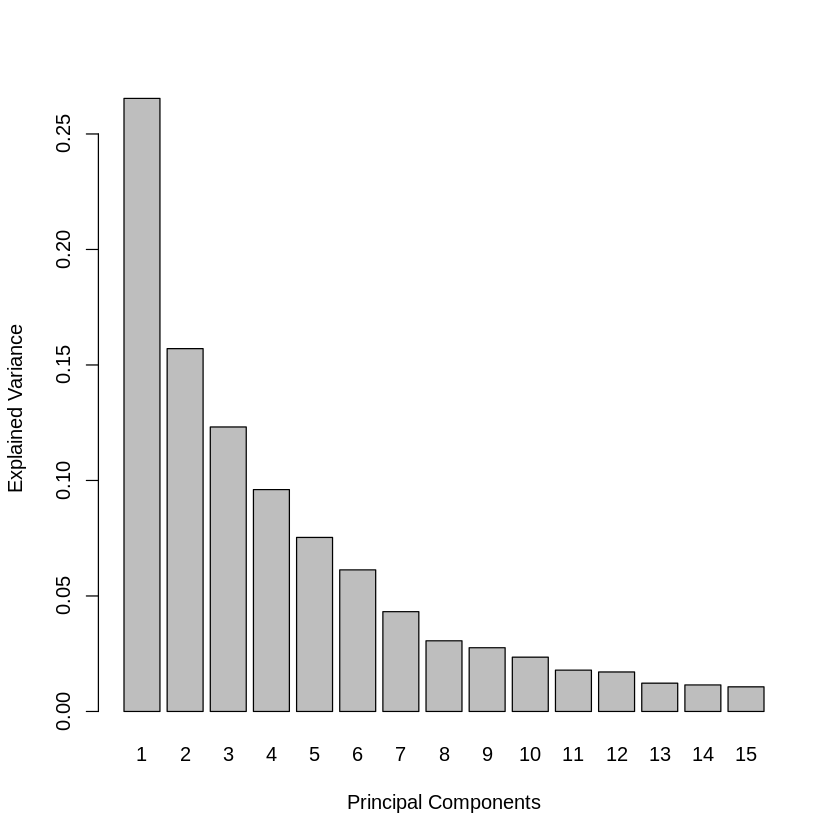

In [ ]:
x<-Proteomics_Rosettes_CW
tune_pca_Proteomics_Rosettes_CW<- tune.pca(x, ncomp = 15, scale = TRUE)
plot(tune_pca_Proteomics_Rosettes_CW)
print(tune_pca_Proteomics_Rosettes_CW$cum.var)

we observe that the first two principal components explain 40% of the total variance, The rule of thumb for choosing the number of components is not so much to set a hard threshold based on the cumulative proportion of explained variance thus taking 2 comp is enough for our final pca

In [ ]:
# from above we see that cmp1 and cmp2 cmp3 are teh biggest variation of the total variance gence we only use those
final_pca_Proteomics_Rosettes_CW <- pca(x, ncomp = 2, center = TRUE, scale = TRUE)
#final_pca_Metabo_stm  # Lists possible outputs
print(final_pca_Proteomics_Rosettes_CW$var.tot)
print(final_pca_Proteomics_Rosettes_CW$prop_expl_var$X)

[1] 24
      PC1       PC2 
0.2653981 0.1570694 


Identify the informative variables

Top variables on the first component only:

Here the variables are not selected (all are included), but ranked according to their importance in defining each component.

In [ ]:
#idnetifying the informative variables
# Top variables on the first component only:
head(selectVar(final_pca_Proteomics_Rosettes_CW, comp = 1)$value)

,value.var
,<dbl>
AT1G24450,-0.2875393
AT2G47010,-0.2844245
AT3G17840,-0.2716264
AT1G52410,-0.2569700
AT1G49740,-0.2563308
AT1G28600,-0.2559592


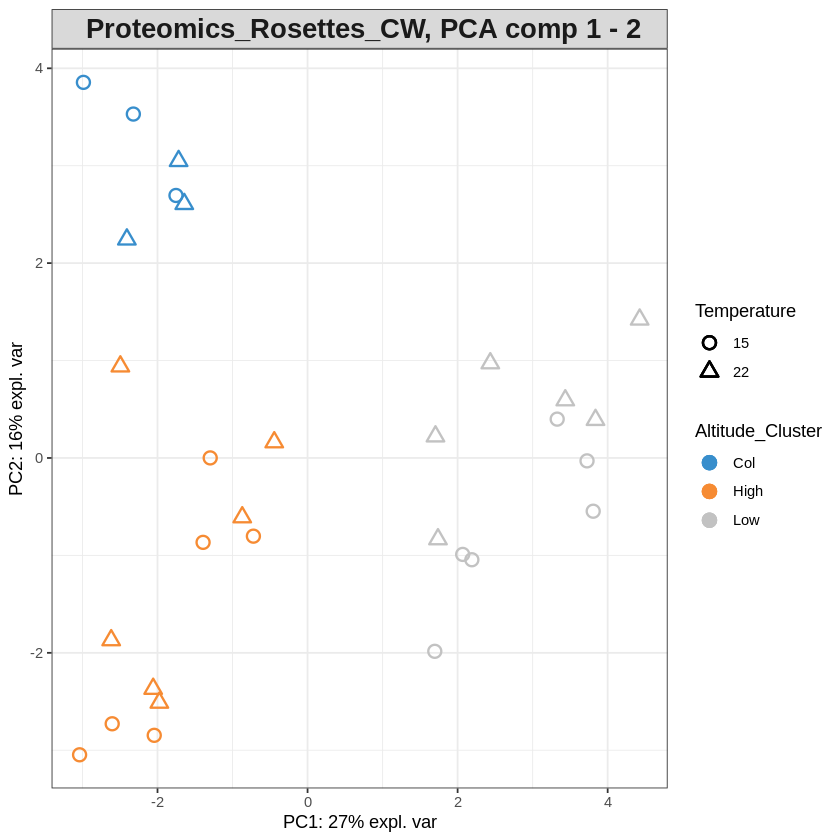

In [ ]:
#sample plots
plotIndiv(final_pca_Proteomics_Rosettes_CW,
          comp = c(1, 2),   # Specify components to plot
          ind.names = TRUE, # Show row names of samples
          group=Altitude_Cluster,
          pch=Temperature,
          title = ' Proteomics_Rosettes_CW, PCA comp 1 - 2',
          legend = TRUE, 
          legend.title = 'Altitude_Cluster',
          legend.title.pch = 'Temperature')

PROTEOMICS Samples are projected into the space spanned by the first two principal components, and coloured according to allttude cluster and shapes according to temperature we can see clearly the clustering based upon the ecotype

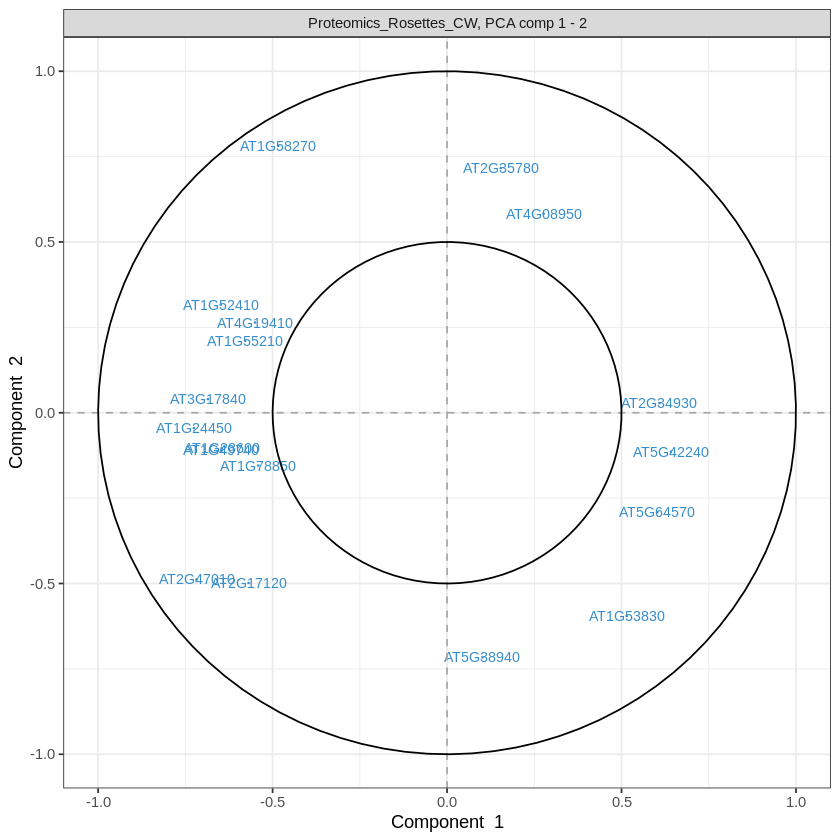

In [ ]:
#variable plot /correlation plot
plotVar(final_pca_Proteomics_Rosettes_CW, comp = c(1, 2),
        var.names = TRUE,
        cex = 3,         # To change the font size
       cutoff = 0.5,  # For further cutoff
        title = 'Proteomics_Rosettes_CW, PCA comp 1 - 2')

Correlation Circle plot from the PCA performed on the phenomics data. The plot shows variable that contribute to PCs and how they contribute
 

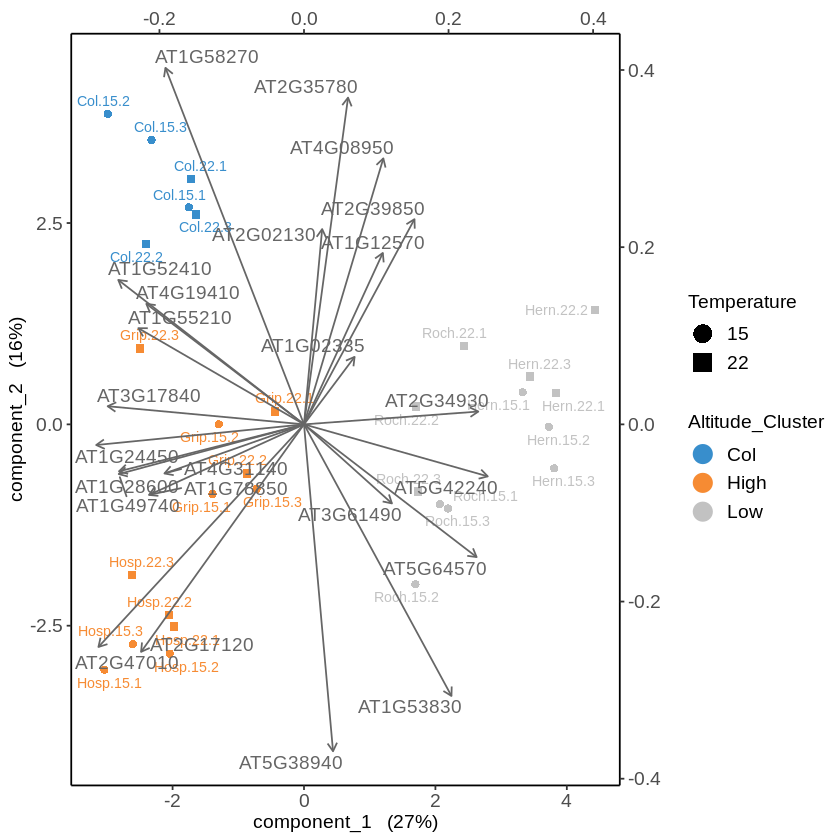

In [ ]:
#Biplot samples and variables 
biplot(final_pca_Proteomics_Rosettes_CW,
        group = Altitude_Cluster ,
        pch = Temperature, 
       legend.title = 'Altitude_Cluster',
       legend.title.pch="Temperatue")

This plot can indicate what variables are responsible for explaining distibution in the sample values. A variable vector that points towards a set of certain points can provide information on what caused the clustering of those points. every sub group of proteomics point to a sub cluster of samples we can say variables  (proteomics) defines the clustering of samples based on temperature and alltitude clustering 

**Transcriptomics_Rosettes:**

      PC1       PC2       PC3       PC4       PC5       PC6       PC7       PC8 
0.5169664 0.8746543 0.9016273 0.9242379 0.9460904 0.9643486 0.9751242 0.9829469 
      PC9      PC10      PC11      PC12      PC13      PC14      PC15 
0.9873137 0.9911053 0.9938621 0.9953555 0.9966674 0.9977651 0.9987587 


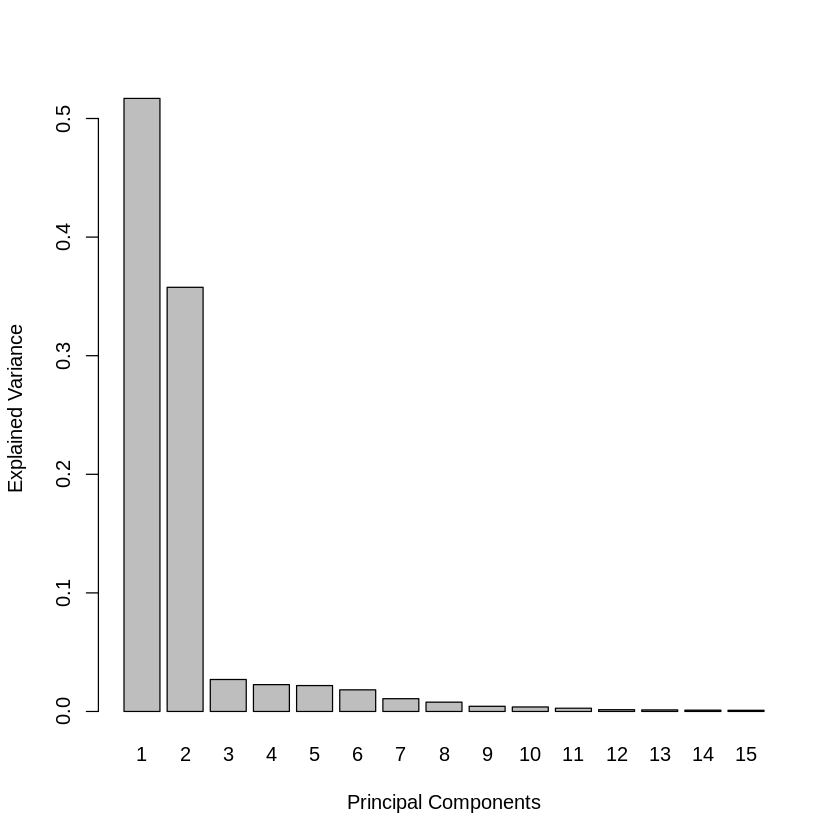

In [ ]:
x<-Transcriptomics_Rosettes
tune_pca_Transcriptomics_Rosettes<- tune.pca(x, ncomp = 15, scale = TRUE)
plot(tune_pca_Transcriptomics_Rosettes)
print(tune_pca_Transcriptomics_Rosettes$cum.var)

we observe that the first two principal components explain 86% of the total variance, The rule of thumb for choosing the number of components is not so much to set a hard threshold based on the cumulative proportion of explained variance thus taking 2 comp is enough for our final pca

In [ ]:
# from above we see that cmp1 and cmp2 cmp3 are teh biggest variation of the total variance gence we only use those
final_pca_Transcriptomics_Rosettes<- pca(x, ncomp = 2, center = TRUE, scale = TRUE)
#final_pca_Metabo_stm  # Lists possible outputs
print(final_pca_Transcriptomics_Rosettes$var.tot)
print(final_pca_Transcriptomics_Rosettes$prop_expl_var$X)

[1] 19
      PC1       PC2 
0.5169664 0.3576879 


Identify the informative variables

Top variables on the first component only:

Here the variables are not selected (all are included), but ranked according to their importance in defining each component.

In [ ]:
#idnetifying the informative variables
# Top variables on the first component only:
head(selectVar(final_pca_Transcriptomics_Rosettes, comp = 1)$value)

,value.var
,<dbl>
AT5G36170,-0.3044968
AT1G45180,-0.2969895
AT5G03010,0.2854775
AT1G25155,0.2839585
AT1G24807,0.2814845
AT1G67560,-0.2779583


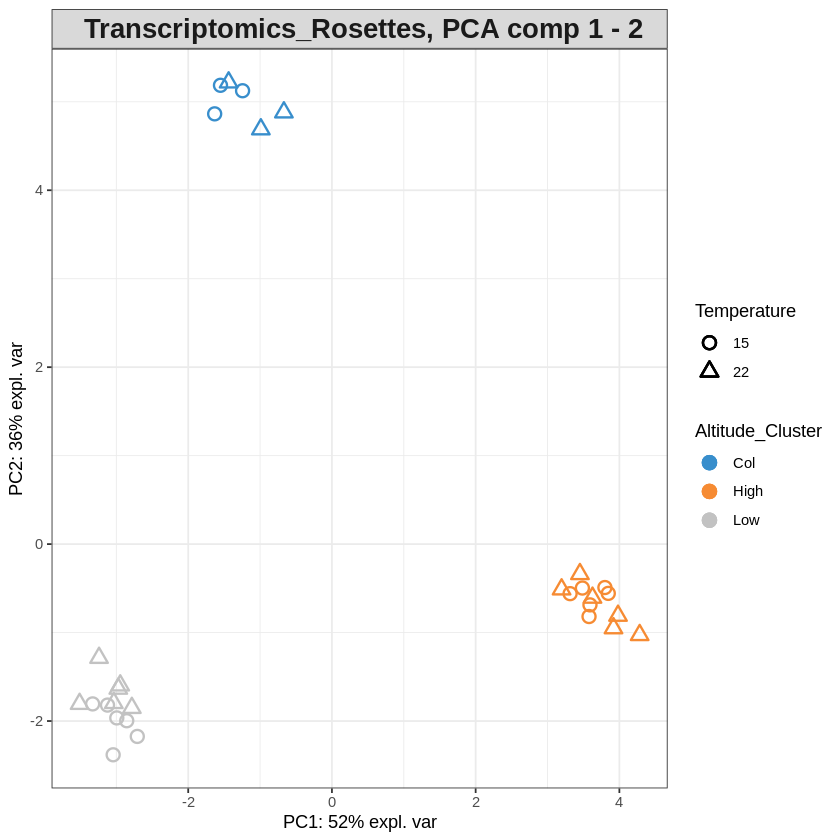

In [ ]:
#sample plots
plotIndiv(final_pca_Transcriptomics_Rosettes,
          comp = c(1, 2),   # Specify components to plot
          ind.names = TRUE, # Show row names of samples
          group=Altitude_Cluster,
          pch=Temperature,
          title = ' Transcriptomics_Rosettes, PCA comp 1 - 2',
          legend = TRUE, 
          legend.title = 'Altitude_Cluster',
          legend.title.pch = 'Temperature')

Transcriptomics rosette Samples are projected into the space spanned by the first two principal components, and coloured according to allttude cluster and shapes according to temperature we can see clearly the clustering based upon the ecotype

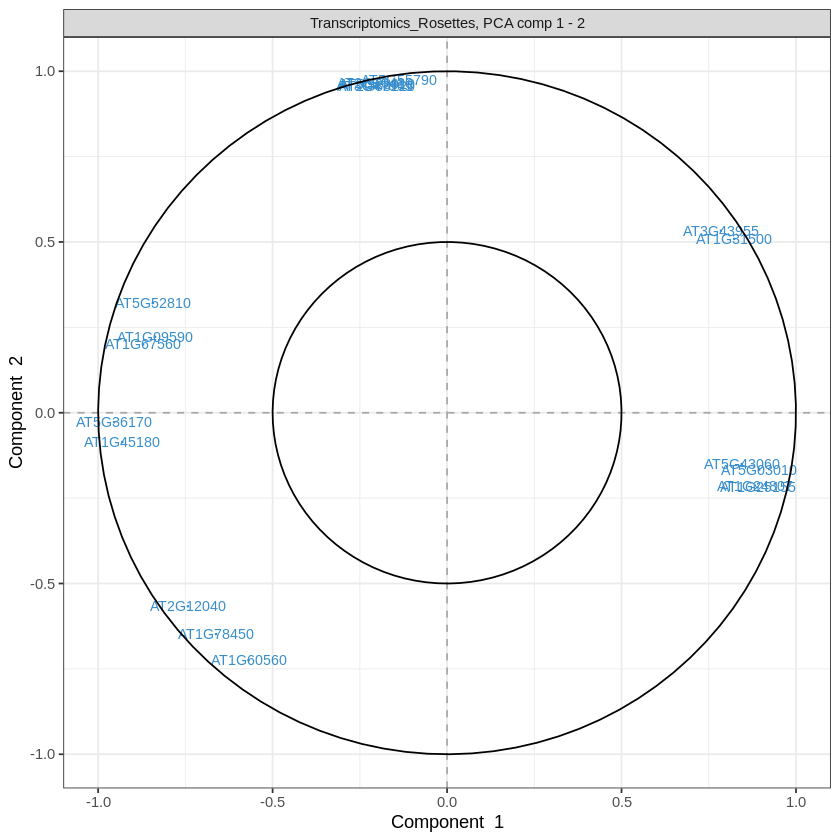

In [ ]:
#variable plot /correlation plot
plotVar(final_pca_Transcriptomics_Rosettes, comp = c(1, 2),
        var.names = TRUE,
        cex = 3,         # To change the font size
       #cutoff = 0.3,  # For further cutoff
        title = 'Transcriptomics_Rosettes, PCA comp 1 - 2')

Correlation Circle plot from the PCA performed on the phenomics data. The plot shows variable that contribute to PCs and how they contribute
 

Warning message:
“ggrepel: 17 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


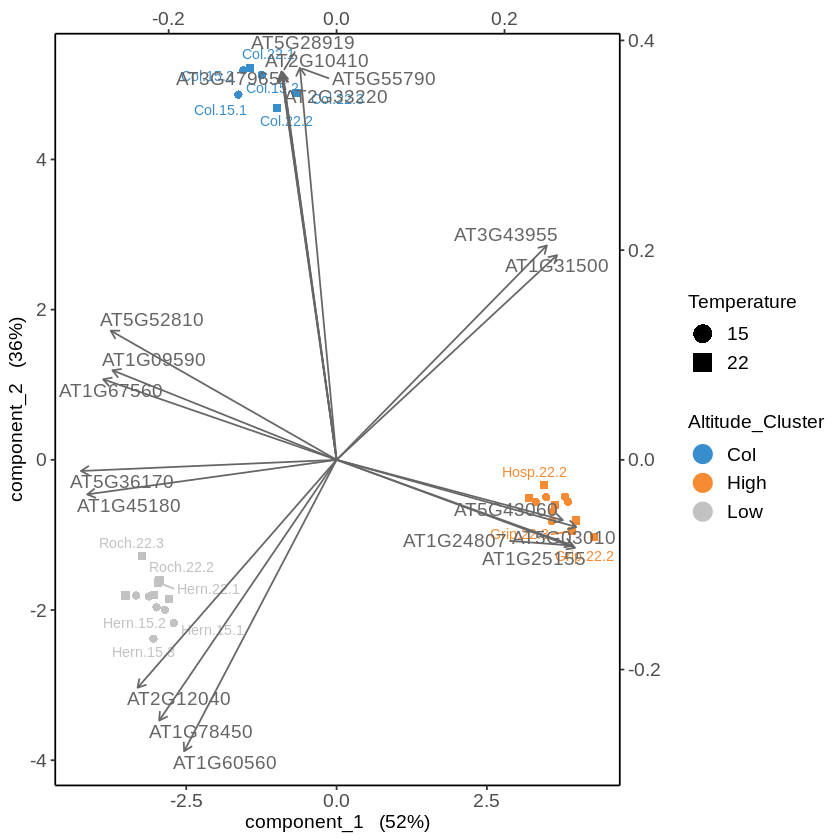

In [ ]:
#Biplot samples and variables 
biplot(final_pca_Transcriptomics_Rosettes,
        group = Altitude_Cluster ,
        pch = Temperature, 
       legend.title = 'Altitude_Cluster',
       legend.title.pch="Temperatue")

This plot can indicate what variables are responsible for explaining distibution in the sample values. A variable vector that points towards a set of certain points can provide information on what caused the clustering of those points. every sub group of transcriptomics point to a sub cluster of samples we can say variables  (transcriptomics) defines the clustering of samples based on temperature and alltitude clustering 

**Transcriptomics_Rosettes_CW:**

      PC1       PC2       PC3       PC4       PC5       PC6       PC7       PC8 
0.3548046 0.5639960 0.6926404 0.7874478 0.8426036 0.8863531 0.9250554 0.9480131 
      PC9      PC10      PC11      PC12      PC13      PC14      PC15 
0.9662099 0.9798604 0.9866556 0.9914593 0.9951019 0.9979991 1.0000000 


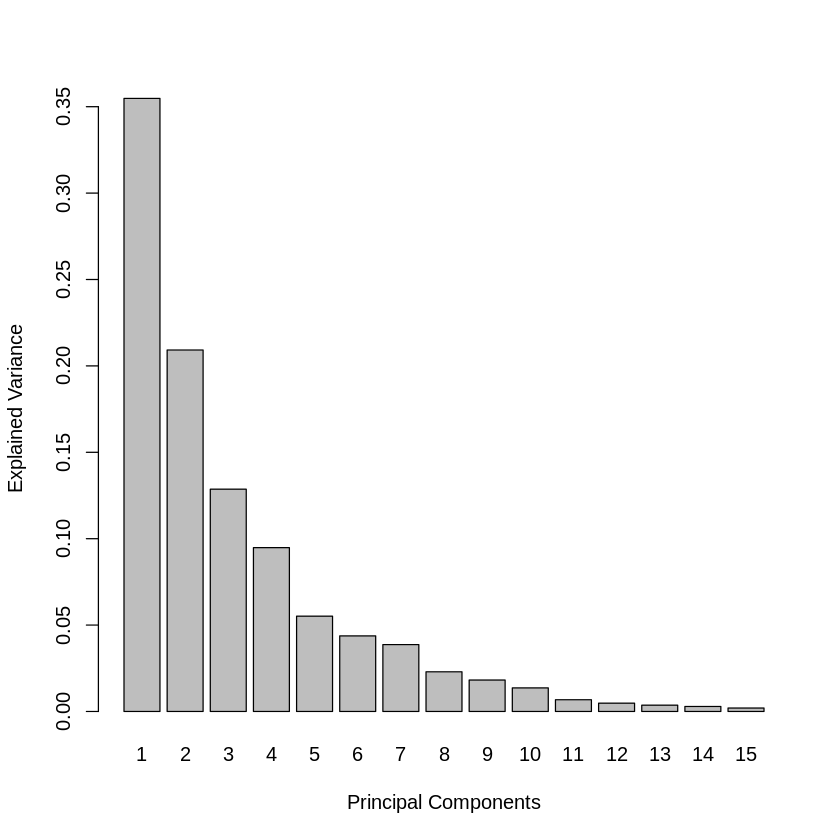

In [ ]:
x<-Transcriptomics_Rosettes_CW
tune_pca_Transcriptomics_Rosettes_CW<- tune.pca(x, ncomp = 15, scale = TRUE)
plot(tune_pca_Transcriptomics_Rosettes_CW)
print(tune_pca_Transcriptomics_Rosettes_CW$cum.var)

we observe that the first two principal components explain 86% of the total variance, The rule of thumb for choosing the number of components is not so much to set a hard threshold based on the cumulative proportion of explained variance thus taking 2 comp is enough for our final pca

In [ ]:
# from above we see that cmp1 and cmp2 cmp3 are teh biggest variation of the total variance gence we only use those
final_pca_Transcriptomics_Rosettes_CW<- pca(x, ncomp = 2, center = TRUE, scale = TRUE)
#final_pca_Metabo_stm  # Lists possible outputs
print(final_pca_Transcriptomics_Rosettes_CW$var.tot)
print(final_pca_Transcriptomics_Rosettes_CW$prop_expl_var$X)

[1] 15
      PC1       PC2 
0.3548046 0.2091914 


Identify the informative variables

Top variables on the first component only:

Here the variables are not selected (all are included), but ranked according to their importance in defining each component.

In [ ]:
#idnetifying the informative variables
# Top variables on the first component only:
head(selectVar(final_pca_Transcriptomics_Rosettes_CW, comp = 1)$value)

,value.var
,<dbl>
AT5G42240,0.3455179
AT1G61900,0.3354367
AT5G43060,-0.3102449
AT2G47010,-0.2900044
AT2G04160,-0.2762665
AT1G78040,0.2726598


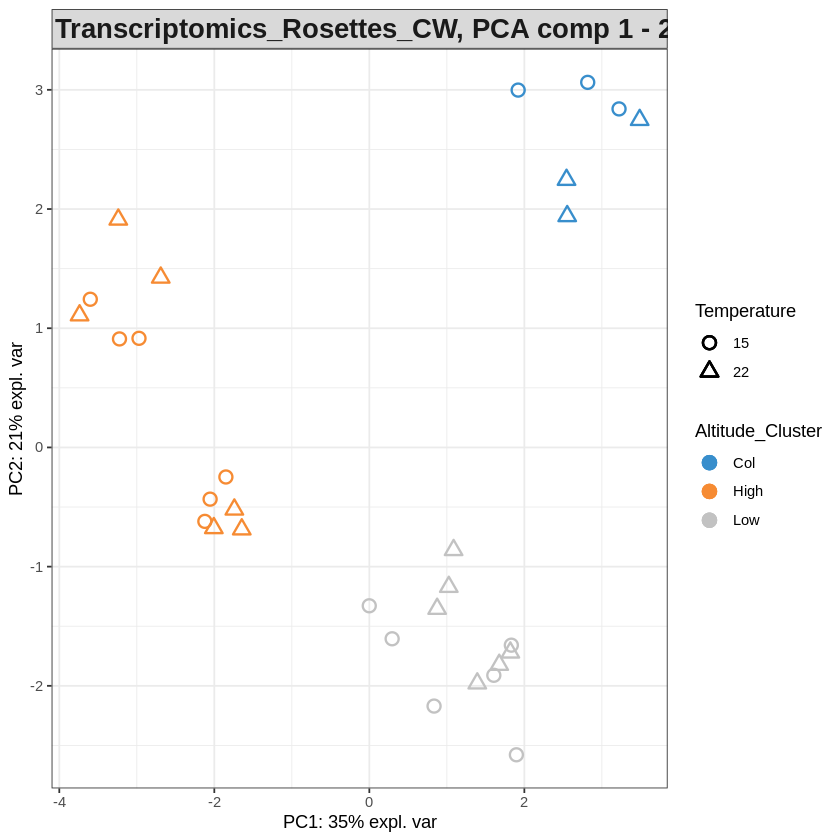

In [ ]:
#sample plots
plotIndiv(final_pca_Transcriptomics_Rosettes_CW,
          comp = c(1, 2),   # Specify components to plot
          ind.names = TRUE, # Show row names of samples
          group=Altitude_Cluster,
          pch=Temperature,
          title = ' Transcriptomics_Rosettes_CW, PCA comp 1 - 2',
          legend = TRUE, 
          legend.title = 'Altitude_Cluster',
          legend.title.pch = 'Temperature')

Transcriptomics CW rosette Samples are projected into the space spanned by the first two principal components, and coloured according to allttude cluster and shapes according to temperature we can see clearly the clustering based upon the ecotype

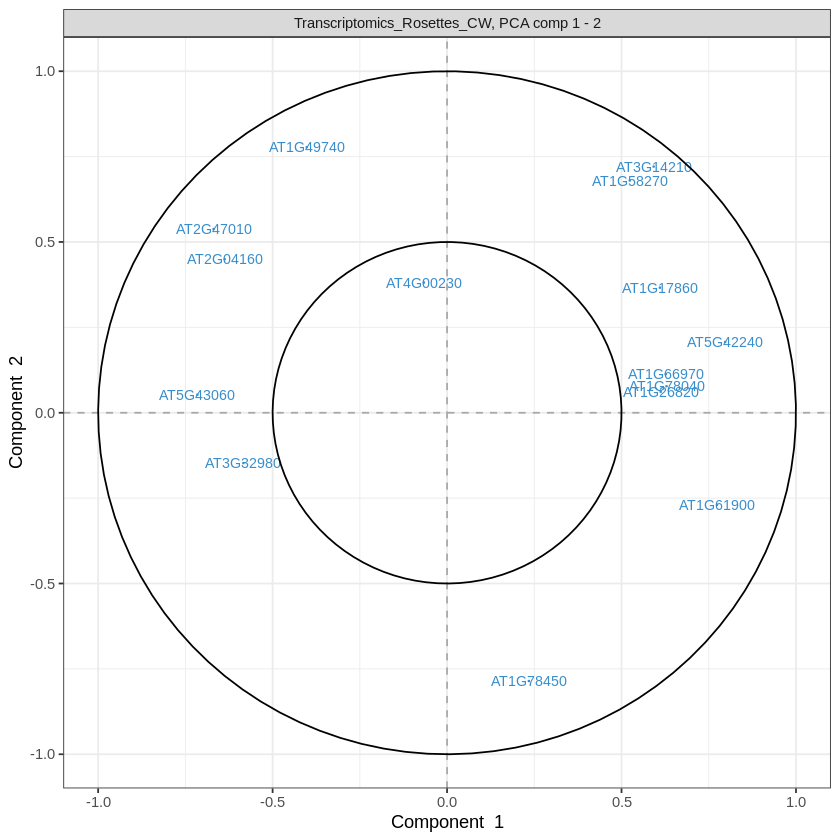

In [ ]:
#variable plot /correlation plot
plotVar(final_pca_Transcriptomics_Rosettes_CW, comp = c(1, 2),
        var.names = TRUE,
        cex = 3,         # To change the font size
       #cutoff = 0.3,  # For further cutoff
        title = 'Transcriptomics_Rosettes_CW, PCA comp 1 - 2')

Correlation Circle plot from the PCA performed on the phenomics data. The plot shows variable that contribute to PCs and how they contribute
 

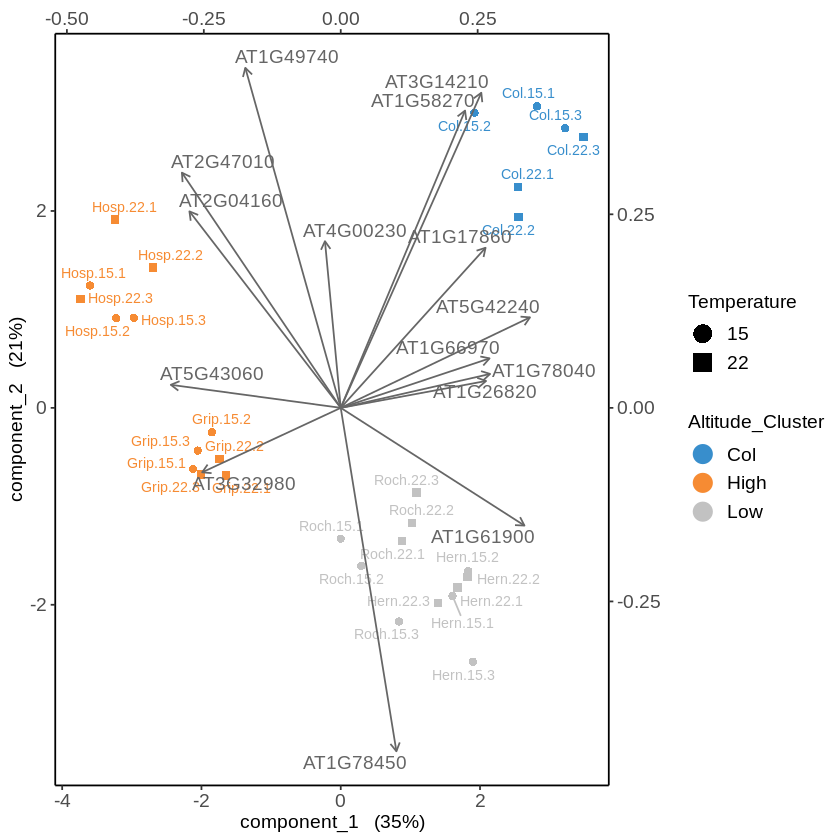

In [ ]:
#Biplot samples and variables 
biplot(final_pca_Transcriptomics_Rosettes_CW,
        group = Altitude_Cluster ,
        pch = Temperature, 
       legend.title = 'Altitude_Cluster',
       legend.title.pch="Temperatue")

This plot can indicate what variables are responsible for explaining distibution in the sample values. A variable vector that points towards a set of certain points can provide information on what caused the clustering of those points. every sub group of transcriptomics CW point to a sub cluster of samples we can say variables  (transcriptomics CW) defines the clustering of samples based on temperature and alltitude clustering 

#.</br>
.</br>
.</br>
.</br>
.</br>
.</br>
.</br>
.</br>
.</br>




#UNIVARIATE STEM Altitude_Cluster

###Exploratory Data Analysis:
handleing missing values in each data frame using median imputation

In [ ]:
for(i in 1:ncol(Metabolomics_Stems)){Metabolomics_Stems[,i][is.na(Metabolomics_Stems[,i])]<-median(Metabolomics_Stems[,i],na.rm=TRUE)}

for(i in 1:ncol(Phenomics_Stems)){Phenomics_Stems[,i][is.na(Phenomics_Stems[,i])]<-median(Phenomics_Stems[,i],na.rm=TRUE)}

for(i in 1:ncol(Proteomics_Stems_CW)){Proteomics_Stems_CW[,i][is.na(Proteomics_Stems_CW[,i])]<-median(Proteomics_Stems_CW[,i],na.rm=TRUE)}

for(i in 1:ncol(Transcriptomics_Stems)){Transcriptomics_Stems[,i][is.na(Transcriptomics_Stems[,i])]<-median(Transcriptomics_Stems[,i],na.rm=TRUE)}

for(i in 1:ncol(Transcriptomics_Stems_CW)){Transcriptomics_Stems_CW[,i][is.na(Transcriptomics_Stems_CW[,i])]<-median(Transcriptomics_Stems_CW[,i],na.rm=TRUE)}


###handling nonzero 
cause it cause problem in diablo WITH TRANSCRIPTOMICS

In [ ]:
my_nearZeroVar<-nearZeroVar(Transcriptomics_Stems)
#head(my_nearZeroVar$Metrics)
Transcriptomics_Stems <- Transcriptomics_Stems[,-which(colnames(Transcriptomics_Stems)%in%rownames(my_nearZeroVar$Metrics))]


###feature selection

Warning message in lognet(xd, is.sparse, ix, jx, y, weights, offset, alpha, nobs, :
“one multinomial or binomial class has fewer than 8  observations; dangerous ground”
Warning message in lognet(xd, is.sparse, ix, jx, y, weights, offset, alpha, nobs, :
“one multinomial or binomial class has fewer than 8  observations; dangerous ground”
Warning message in lognet(xd, is.sparse, ix, jx, y, weights, offset, alpha, nobs, :
“one multinomial or binomial class has fewer than 8  observations; dangerous ground”
Warning message in lognet(xd, is.sparse, ix, jx, y, weights, offset, alpha, nobs, :
“one multinomial or binomial class has fewer than 8  observations; dangerous ground”
Warning message in lognet(xd, is.sparse, ix, jx, y, weights, offset, alpha, nobs, :
“one multinomial or binomial class has fewer than 8  observations; dangerous ground”
Warning message in lognet(xd, is.sparse, ix, jx, y, weights, offset, alpha, nobs, :
“one multinomial or binomial class has fewer than 8  observations; dang

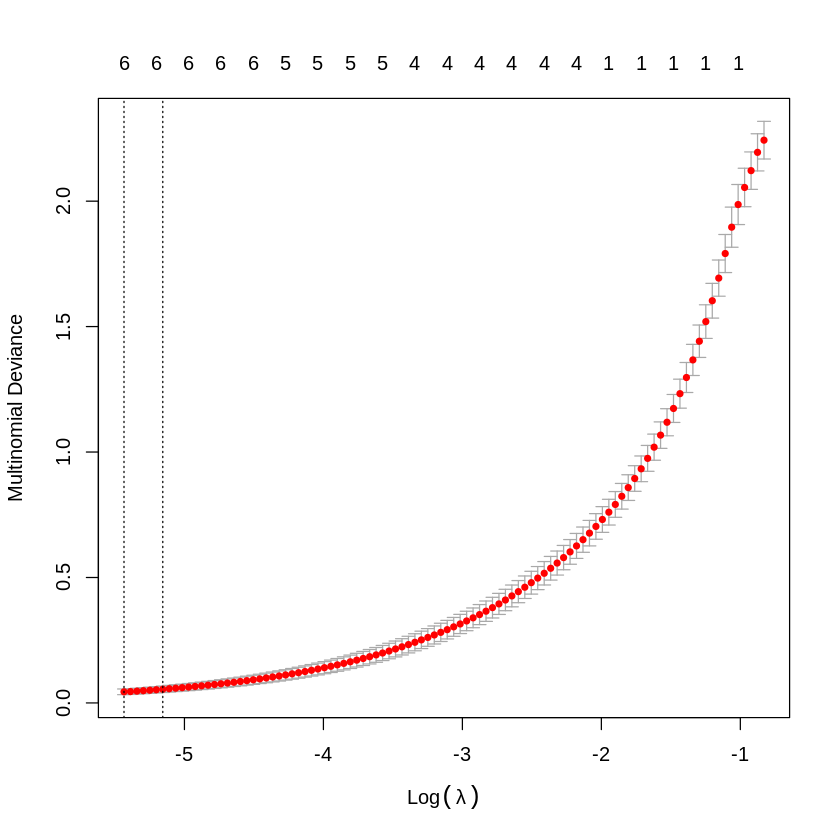

In [ ]:
#Proteomics_Stems_CW
lasso_fit <- cv.glmnet(as.matrix(Proteomics_Stems_CW), Altitude_Cluster, family="multinomial", alpha=1)
plot(lasso_fit)

In [ ]:

coef<-predict(lasso_fit, s = "lambda.min", type = "nonzero")
features<-colnames(Proteomics_Stems_CW)[unlist(coef)]
Proteomics_Stems_CW<-subset(Proteomics_Stems_CW, select = as.character(features))

#here we can't have df with var name and score cause it's multinomial but these colnames are enough to subset are data set with only informative vars

Warning message in lognet(xd, is.sparse, ix, jx, y, weights, offset, alpha, nobs, :
“one multinomial or binomial class has fewer than 8  observations; dangerous ground”
Warning message in lognet(xd, is.sparse, ix, jx, y, weights, offset, alpha, nobs, :
“one multinomial or binomial class has fewer than 8  observations; dangerous ground”
Warning message in lognet(xd, is.sparse, ix, jx, y, weights, offset, alpha, nobs, :
“one multinomial or binomial class has fewer than 8  observations; dangerous ground”
Warning message in lognet(xd, is.sparse, ix, jx, y, weights, offset, alpha, nobs, :
“one multinomial or binomial class has fewer than 8  observations; dangerous ground”
Warning message in lognet(xd, is.sparse, ix, jx, y, weights, offset, alpha, nobs, :
“one multinomial or binomial class has fewer than 8  observations; dangerous ground”
Warning message in lognet(xd, is.sparse, ix, jx, y, weights, offset, alpha, nobs, :
“one multinomial or binomial class has fewer than 8  observations; dang

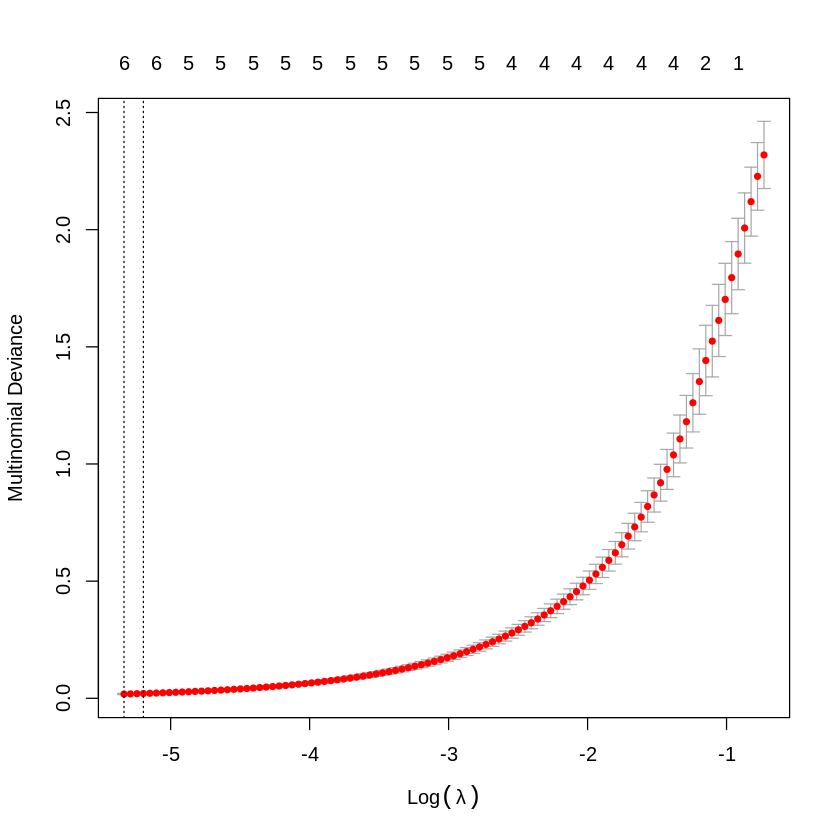

In [ ]:
#Transcriptomics_Stems
lasso_fit <- cv.glmnet(as.matrix(Transcriptomics_Stems), Altitude_Cluster, family="multinomial", alpha=1)
plot(lasso_fit)

In [ ]:

coef<-predict(lasso_fit, s = "lambda.min", type = "nonzero")
features<-colnames(Transcriptomics_Stems)[unlist(coef)]
Transcriptomics_Stems<-subset(Transcriptomics_Stems, select = as.character(features))

#here we can't have df with var name and score cause it's multinomial but these colnames are enough to subset are data set with only informative vars

Warning message in lognet(xd, is.sparse, ix, jx, y, weights, offset, alpha, nobs, :
“one multinomial or binomial class has fewer than 8  observations; dangerous ground”
Warning message in lognet(xd, is.sparse, ix, jx, y, weights, offset, alpha, nobs, :
“one multinomial or binomial class has fewer than 8  observations; dangerous ground”
Warning message in lognet(xd, is.sparse, ix, jx, y, weights, offset, alpha, nobs, :
“one multinomial or binomial class has fewer than 8  observations; dangerous ground”
Warning message in lognet(xd, is.sparse, ix, jx, y, weights, offset, alpha, nobs, :
“one multinomial or binomial class has fewer than 8  observations; dangerous ground”
Warning message in lognet(xd, is.sparse, ix, jx, y, weights, offset, alpha, nobs, :
“one multinomial or binomial class has fewer than 8  observations; dangerous ground”
Warning message in lognet(xd, is.sparse, ix, jx, y, weights, offset, alpha, nobs, :
“one multinomial or binomial class has fewer than 8  observations; dang

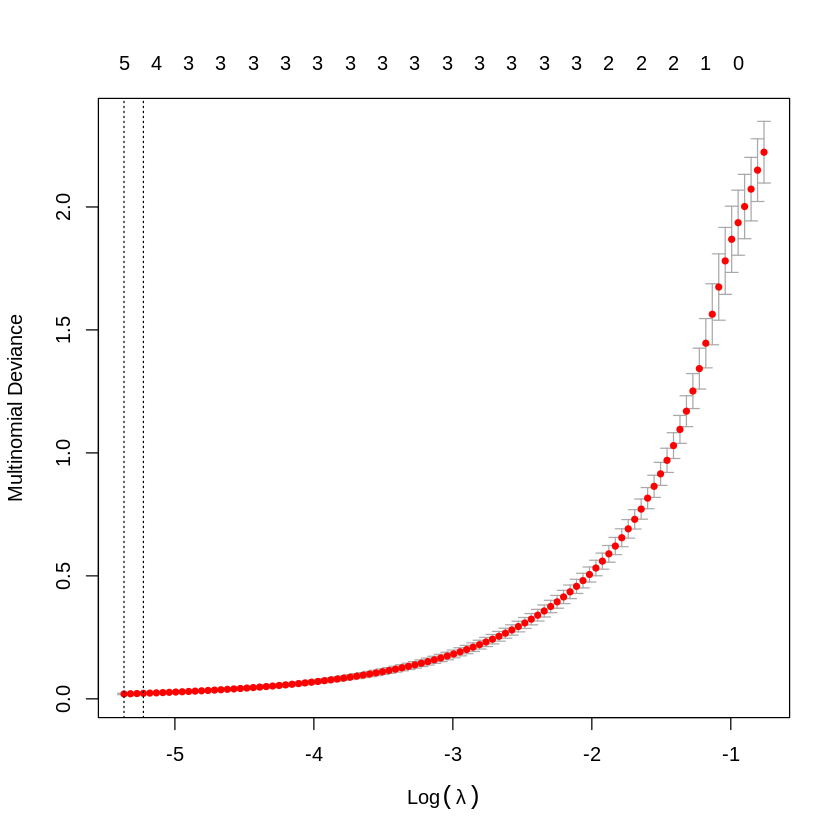

In [ ]:
#Transcriptomics_Stems_CW
lasso_fit <- cv.glmnet(as.matrix(Transcriptomics_Stems_CW), Altitude_Cluster, family="multinomial", alpha=1)
plot(lasso_fit)

In [ ]:

coef<-predict(lasso_fit, s = "lambda.min", type = "nonzero")
features<-colnames(Transcriptomics_Stems_CW)[unlist(coef)]
Transcriptomics_Stems_CW<-subset(Transcriptomics_Stems_CW, select = as.character(features))

#here we can't have df with var name and score cause it's multinomial and dufficult but these colnames are enough to subset are data set with only informative vars

In [ ]:
dim(Transcriptomics_Stems_CW)
dim(Transcriptomics_Stems)
dim(Proteomics_Stems_CW)

[1] 30 11

[1] 30 17

[1] 30 16

###PCA Analysis:

**Metabolomics_Stems:**

      PC1       PC2       PC3       PC4       PC5       PC6 
0.5732580 0.8533077 0.9864812 0.9956743 0.9991212 1.0000000 


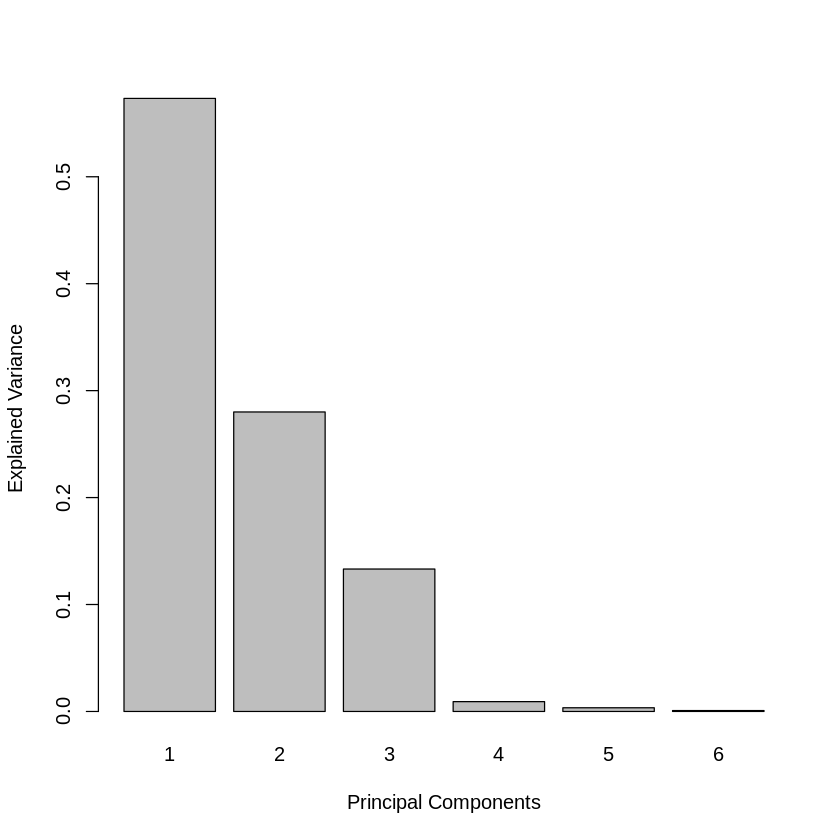

In [ ]:
x<-Metabolomics_Stems
tune_pca_metabo_stm <- tune.pca(x, ncomp = 6, scale = TRUE)
plot(tune_pca_metabo_stm)
print(tune_pca_metabo_stm$cum.var)       # Outputs cumulative proportion of variance

we observe that the first two principal components explain 82% of the total variance, and the first three principal components explain 96% of the total variance. The rule of thumb for choosing the number of components is not so much to set a hard threshold based on the cumulative proportion of explained variance thus taking 2 comp is enough for our final pca

In [ ]:
# from above we see that cmp1 and cmp2 explains 0.85 of the total variance gence we only use those
final_pca_Metabo_stm <- pca(x, ncomp = 2, center = TRUE, scale = TRUE)
#final_pca_Metabo_stm  # Lists possible outputs
print(final_pca_Metabo_stm$var.tot)
print(final_pca_Metabo_stm$prop_expl_var$X)

[1] 6
      PC1       PC2 
0.5732580 0.2800497 


Identify the informative variables

Top variables on the first component only:

Here the variables are not selected (all are included), but ranked according to their importance in defining each component.

In [ ]:
#idnetifying the informative variables
# Top variables on the first component only:
head(selectVar(final_pca_Metabo_stm, comp = 1)$value)

,value.var
,<dbl>
XG,0.5136619
Pectin_HG,0.5076026
RGI_branching,-0.4699712
Pectin_linearity,0.3812306
Pectin_RGI,0.3297546
Contribution_RG,0.0595241


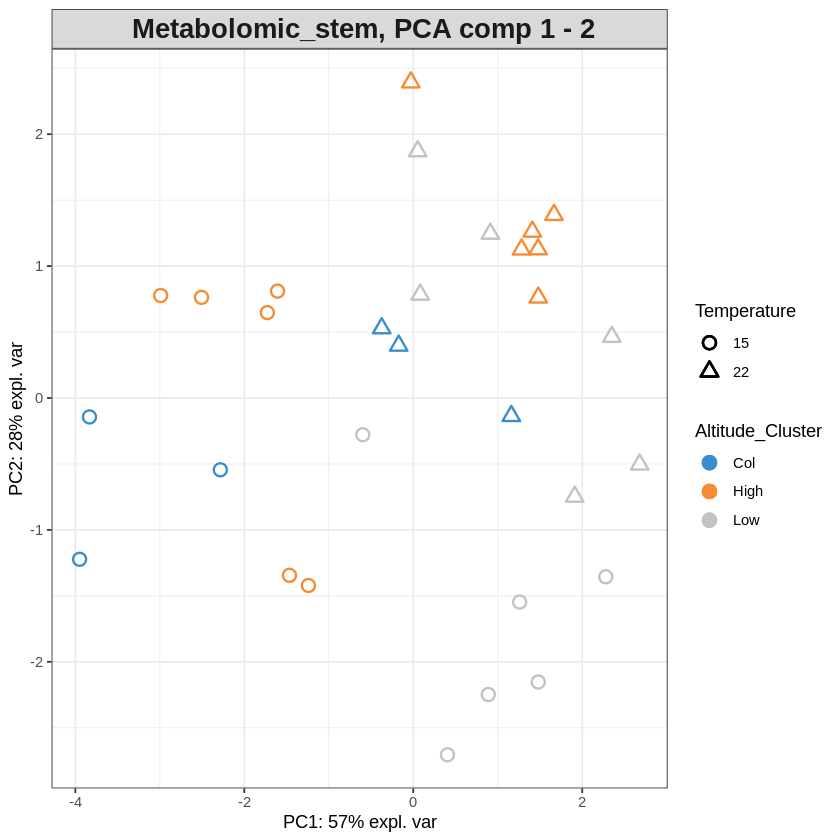

In [ ]:
#sample plots
plotIndiv(final_pca_Metabo_stm,
          comp = c(1, 2),   # Specify components to plot
          ind.names = TRUE, # Show row names of samples
          group=Altitude_Cluster,
          pch=Temperature,
          title = ' Metabolomic_stem, PCA comp 1 - 2',
          legend = TRUE, 
          legend.title = 'Altitude_Cluster',
          legend.title.pch = 'Temperature',)

Metabolomics Rosette Samples are projected into the space spanned by the first two principal components, and coloured according to allttude cluster the codes indicate the rownames of the data

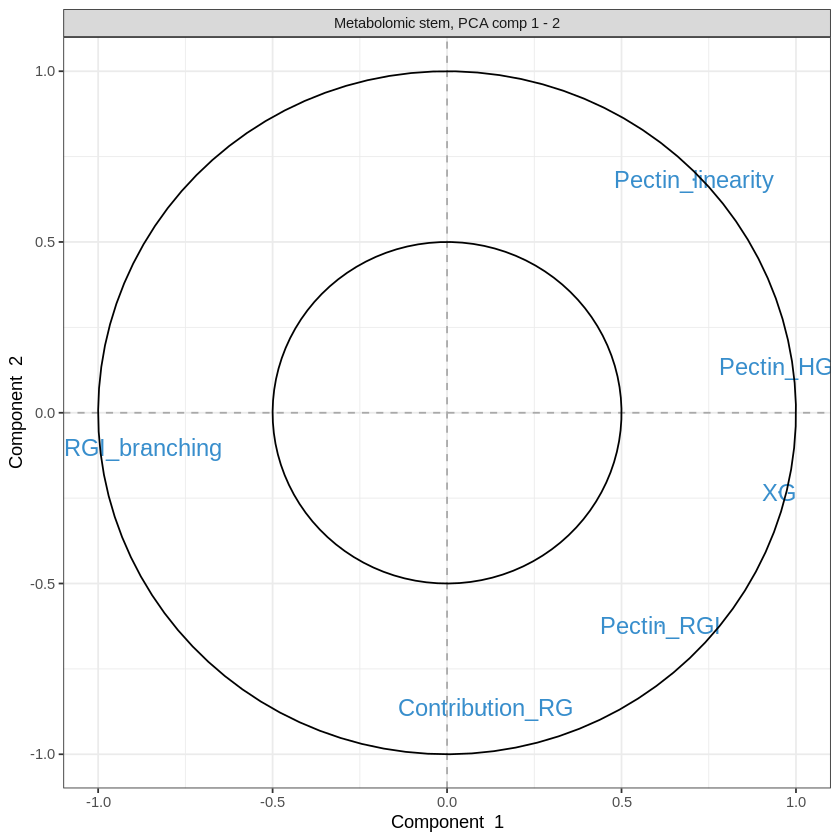

In [ ]:
#variable plot /correlation plot
plotVar(final_pca_Metabo_stm, comp = c(1, 2),
        var.names = TRUE,
        cex = 5,         # To change the font size
        # cutoff = 0.5,  # For further cutoff
        title = 'Metabolomic stem, PCA comp 1 - 2')

Correlation Circle plot from the PCA performed on the metabolomics data. The plot shows variable that contribute to PCs and how they contribute
rgl_branching contribute negativly to PC1 and 0 contribution to PC2 same as pectin_linearity and contibution_rg the only diffrence is that they contribute positivly on PC1

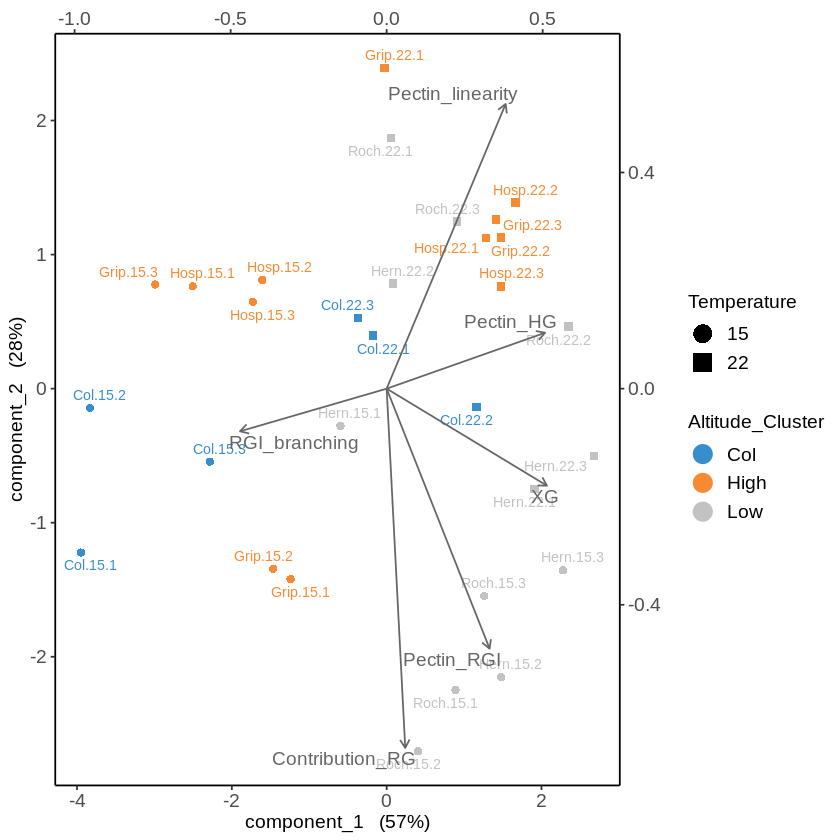

In [ ]:
#Biplot samples and variables 
biplot(final_pca_Metabo_stm,
        group = Altitude_Cluster ,
        pch = Temperature, 
       legend.title = 'Altitude_Cluster',
       legend.title.pch="Temperatue")

This plot can indicate what variables are responsible for explaining distibution in the sample values. A variable vector that points towards a set of certain points can provide information on what caused the clustering of those points. For example, ,pectin_rgi and pectin_hg points to nothing so we can say that they not informative of our samples .

**Phenomics_Stems:**

      PC1       PC2       PC3       PC4 
0.5388177 0.7914988 0.9674033 1.0000000 


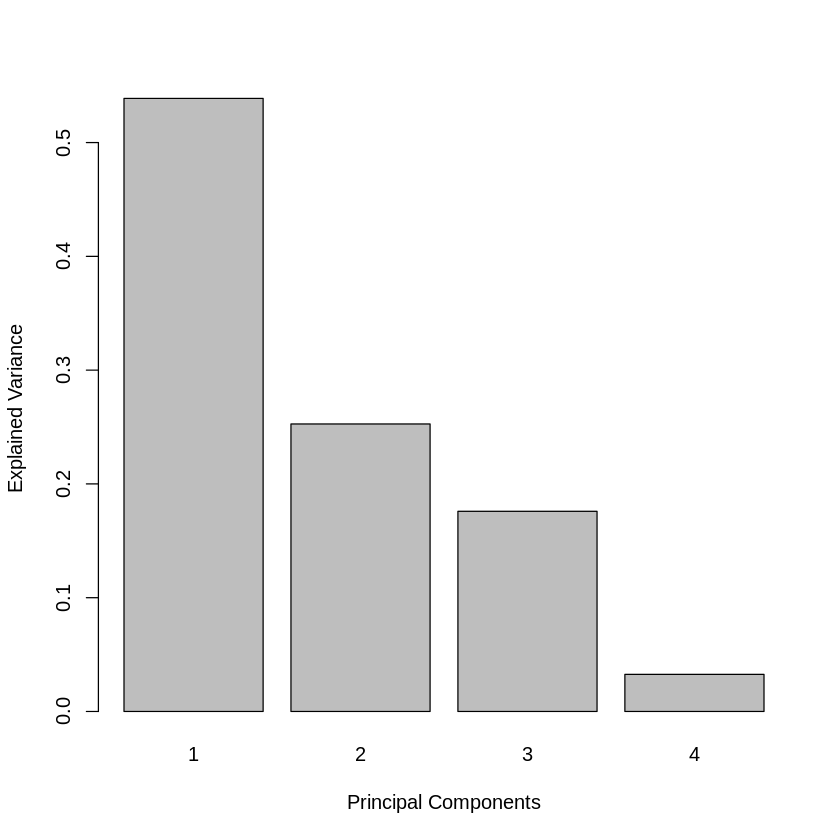

In [ ]:
x<-Phenomics_Stems
tune_pca_Phenomics_Stems <- tune.pca(x, ncomp = 4, scale = TRUE)
plot(tune_pca_Phenomics_Stems)
print(tune_pca_Phenomics_Stems$cum.var)

we observe that the first two principal components explain 93% of the total variance, The rule of thumb for choosing the number of components is not so much to set a hard threshold based on the cumulative proportion of explained variance thus taking 2 comp is enough for our final pca

In [ ]:
# from above we see that cmp1 and cmp2 cmp3 explains 0.96 of the total variance gence we only use those
final_pca_Phenomics_Stems <- pca(x, ncomp = 3, center = TRUE, scale = TRUE)
#final_pca_Metabo_stm  # Lists possible outputs
print(final_pca_Phenomics_Stems$var.tot)
print(final_pca_Phenomics_Stems$prop_expl_var$X)

[1] 4
      PC1       PC2       PC3 
0.5388177 0.2526811 0.1759045 


Identify the informative variables

Top variables on the first component only:

Here the variables are not selected (all are included), but ranked according to their importance in defining each component.

In [ ]:
#idnetifying the informative variables
# Top variables on the first component only:
head(selectVar(final_pca_Phenomics_Stems, comp = 1)$value)

,value.var
,<dbl>
Mass,-0.6493278
Length,-0.5988495
Number_lateral_stems,0.4233349
Diameter,-0.2013462


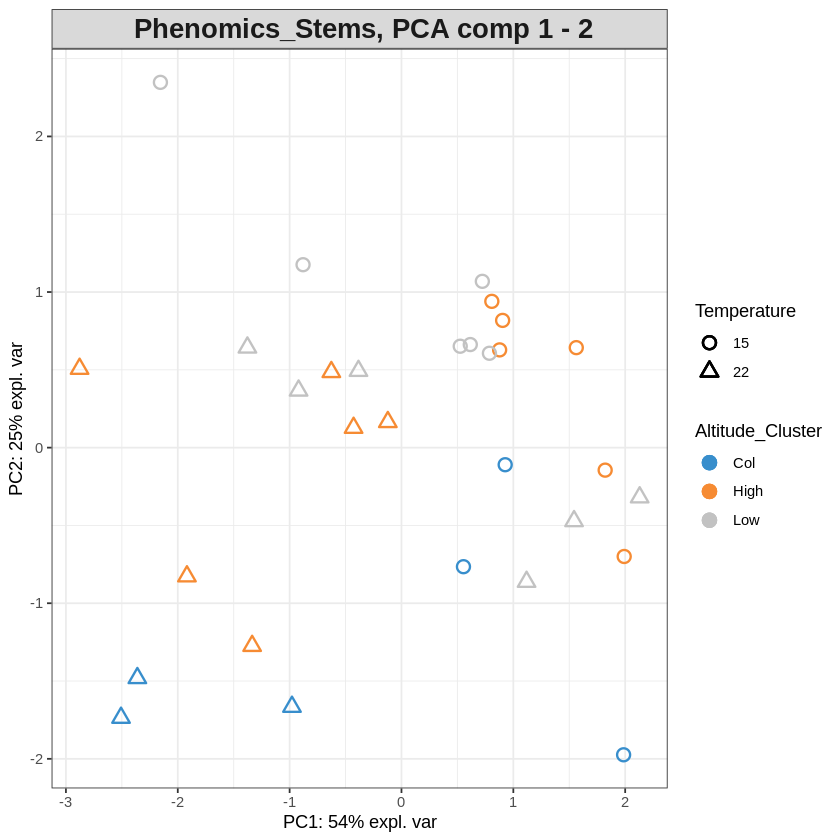

In [ ]:
#sample plots
plotIndiv(final_pca_Phenomics_Stems,
          comp = c(1, 2),   # Specify components to plot
          ind.names = TRUE, # Show row names of samples
          group=Altitude_Cluster,
          pch=Temperature,
          title = ' Phenomics_Stems, PCA comp 1 - 2',
          legend = TRUE, 
          legend.title = 'Altitude_Cluster',
          legend.title.pch = 'Temperature')

phenomics Rosette Samples are projected into the space spanned by the first two principal components, and coloured according to allttude cluster and shapes according to temperature 

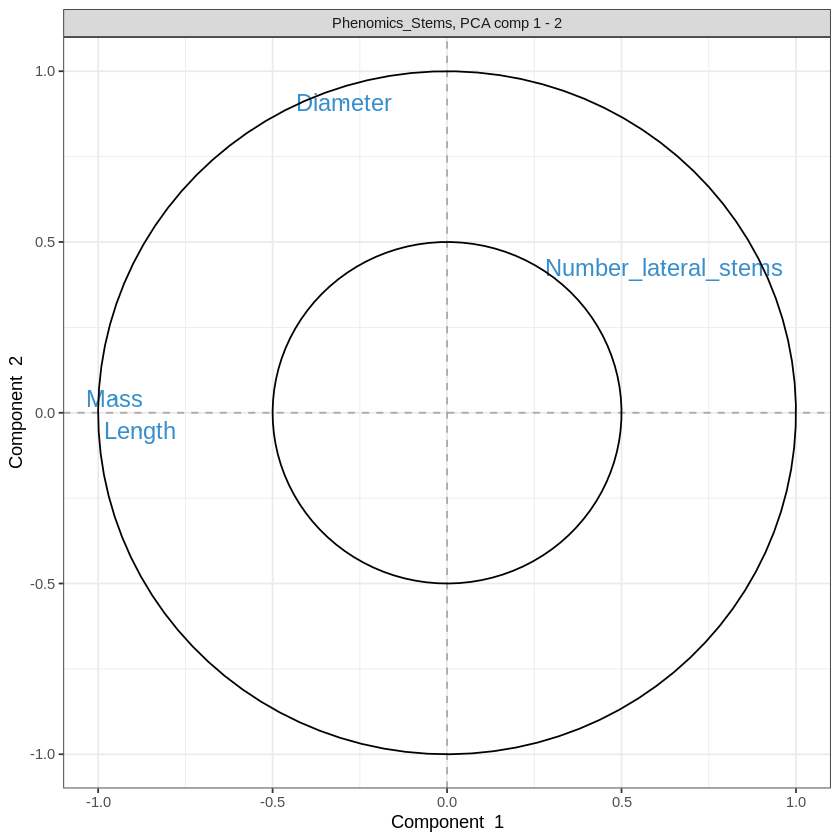

In [ ]:
#variable plot /correlation plot
plotVar(final_pca_Phenomics_Stems, comp = c(1, 2),
        var.names = TRUE,
        cex = 5,         # To change the font size
        # cutoff = 0.5,  # For further cutoff
        title = 'Phenomics_Stems, PCA comp 1 - 2')

Correlation Circle plot from the PCA performed on the phenomics data. The plot shows variable that contribute to PCs and how they contribute

dimater positive on PC2 and negative on PC1

Area and mass positive on on both PCs

leaves_num positive on PC1 and negative on PC2 

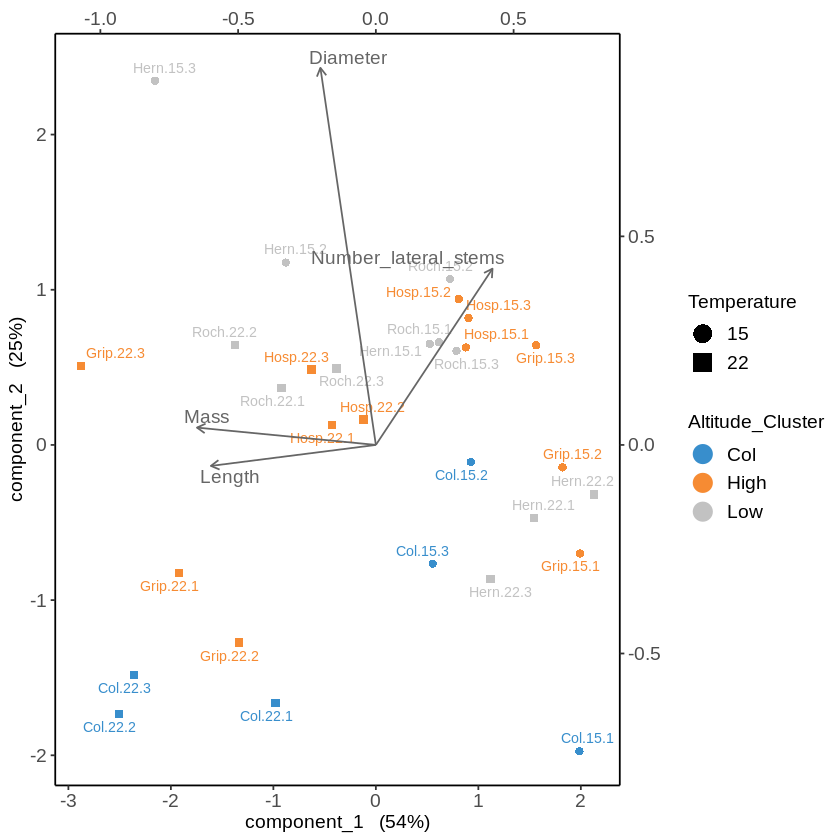

In [ ]:
#Biplot samples and variables 
biplot(final_pca_Phenomics_Stems,
        group = Altitude_Cluster ,
        pch = Temperature, 
       legend.title = 'Altitude_Cluster',
       legend.title.pch="Temperatue")

This plot can indicate what variables are responsible for explaining distibution in the sample values. A variable vector that points towards a set of certain points can provide information on what caused the clustering of those points. For example, ,pectin_rgi and pectin_hg points to nothing so we can say that they not informative of our samples .

**Proteomics_Stems_CW**

      PC1       PC2       PC3       PC4       PC5       PC6       PC7       PC8 
0.4001746 0.6439261 0.7527967 0.8202476 0.8777615 0.9123465 0.9365397 0.9544749 
      PC9      PC10 
0.9685088 0.9788302 


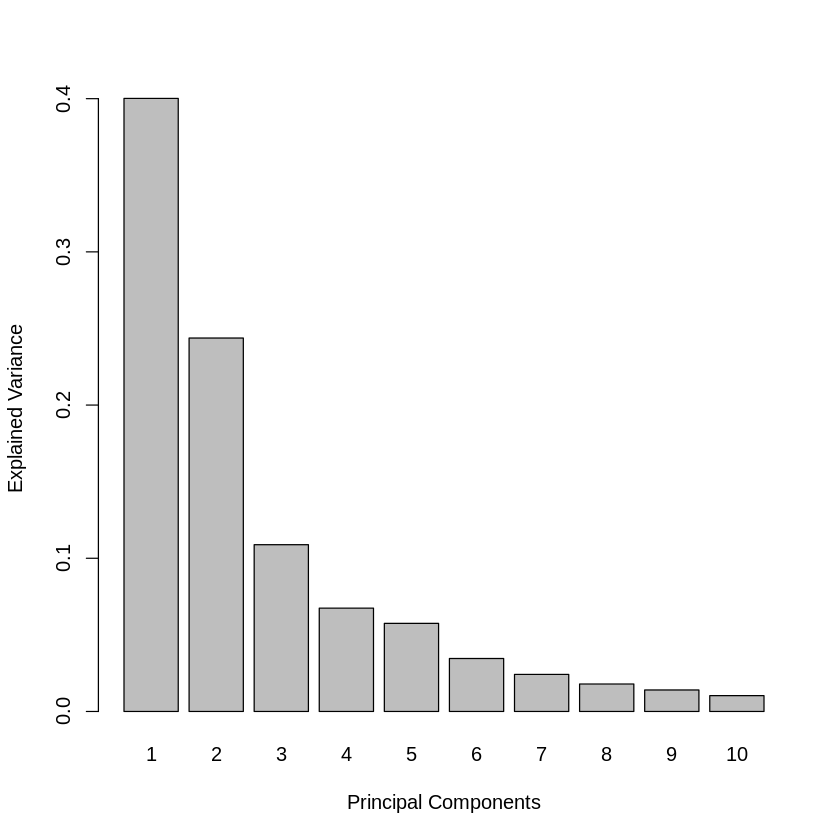

In [ ]:
x<-Proteomics_Stems_CW
tune_pca_Proteomics_Stems_CW<- tune.pca(x, ncomp = 10, scale = TRUE)
plot(tune_pca_Proteomics_Stems_CW)
print(tune_pca_Proteomics_Stems_CW$cum.var)

we observe that the first two principal components explain 40% of the total variance, The rule of thumb for choosing the number of components is not so much to set a hard threshold based on the cumulative proportion of explained variance thus taking 2 comp is enough for our final pca

In [ ]:
# from above we see that cmp1 and cmp2 cmp3 are teh biggest variation of the total variance gence we only use those
final_pca_Proteomics_Stems_CW<- pca(x, ncomp = 2, center = TRUE, scale = TRUE)
#final_pca_Metabo_stm  # Lists possible outputs
print(final_pca_Proteomics_Stems_CW$var.tot)
print(final_pca_Proteomics_Stems_CW$prop_expl_var$X)

[1] 16
      PC1       PC2 
0.4001746 0.2437516 


Identify the informative variables

Top variables on the first component only:

Here the variables are not selected (all are included), but ranked according to their importance in defining each component.

In [ ]:
#idnetifying the informative variables
# Top variables on the first component only:
head(selectVar(final_pca_Proteomics_Stems_CW, comp = 1)$value)

,value.var
,<dbl>
AT2G39850.1,0.3299621
AT2G39850,0.3299621
AT5G43060,-0.3189640
AT1G49740,-0.3101446
AT2G47010,-0.3007705
AT3G49110,-0.2972385


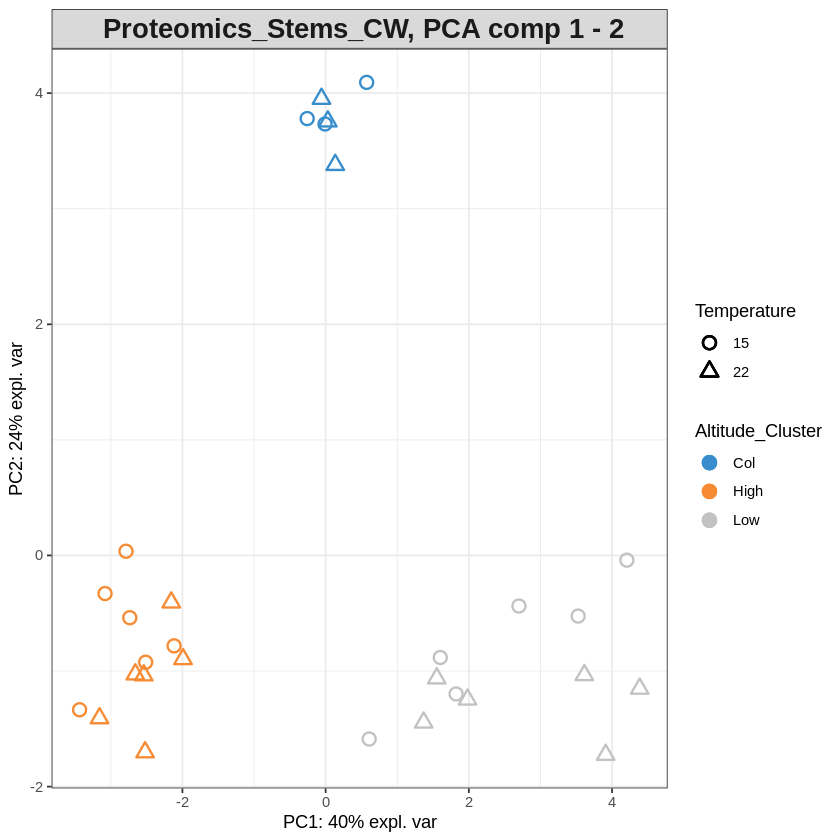

In [ ]:
#sample plots
plotIndiv(final_pca_Proteomics_Stems_CW,
          comp = c(1, 2),   # Specify components to plot
          ind.names = TRUE, # Show row names of samples
          group=Altitude_Cluster,
          pch=Temperature,
          title = ' Proteomics_Stems_CW, PCA comp 1 - 2',
          legend = TRUE, 
          legend.title = 'Altitude_Cluster',
          legend.title.pch = 'Temperature')

PROTEOMICS Samples are projected into the space spanned by the first two principal components, and coloured according to allttude cluster and shapes according to temperature we can see clearly the clustering based upon the ecotype

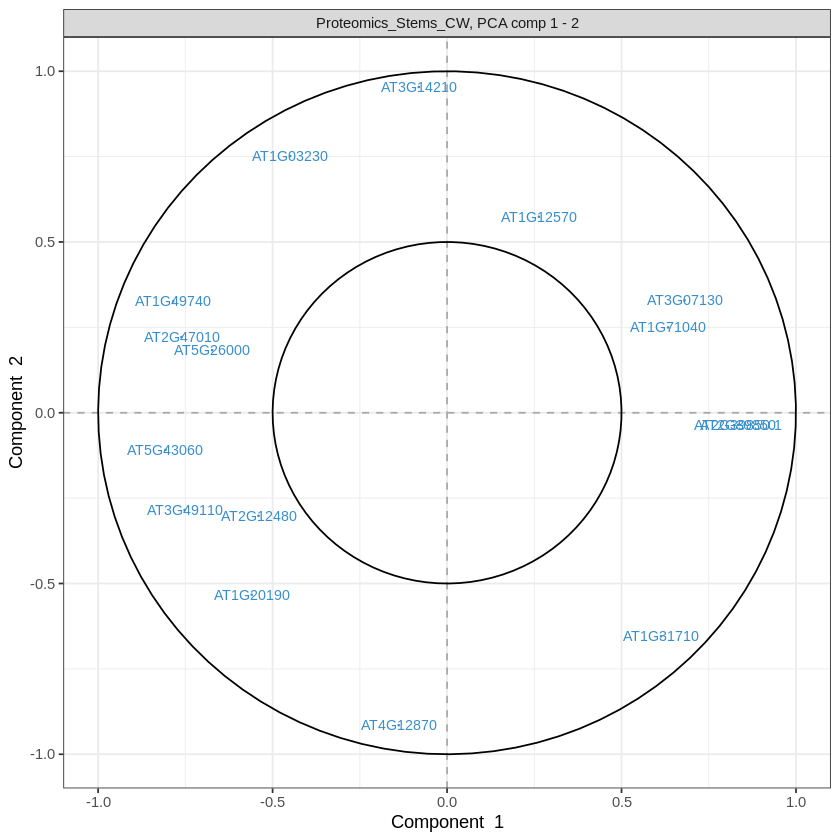

In [ ]:
#variable plot /correlation plot
plotVar(final_pca_Proteomics_Stems_CW, comp = c(1, 2),
        var.names = TRUE,
        cex = 3,         # To change the font size
       cutoff = 0.5,  # For further cutoff
        title = 'Proteomics_Stems_CW, PCA comp 1 - 2')

Correlation Circle plot from the PCA performed on the phenomics data. The plot shows variable that contribute to PCs and how they contribute
 

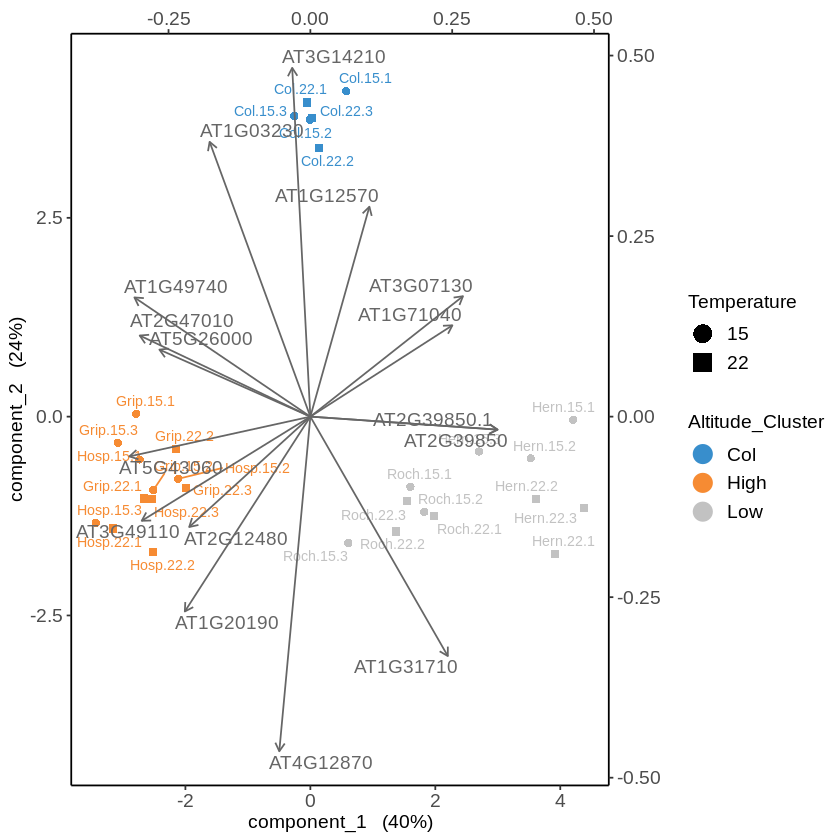

In [ ]:
#Biplot samples and variables 
biplot(final_pca_Proteomics_Stems_CW,
        group = Altitude_Cluster ,
        pch = Temperature, 
       legend.title = 'Altitude_Cluster',
       legend.title.pch="Temperatue")

This plot can indicate what variables are responsible for explaining distibution in the sample values. A variable vector that points towards a set of certain points can provide information on what caused the clustering of those points. every sub group of proteomics point to a sub cluster of samples we can say variables  (proteomics) defines the clustering of samples based on temperature and alltitude clustering 

**Transcriptomics_Stems**

      PC1       PC2       PC3       PC4       PC5       PC6       PC7       PC8 
0.5709805 0.9524997 0.9629696 0.9708272 0.9774957 0.9834519 0.9878119 0.9913389 
      PC9      PC10      PC11      PC12      PC13      PC14 
0.9936547 0.9957119 0.9969872 0.9981433 0.9988832 0.9994803 


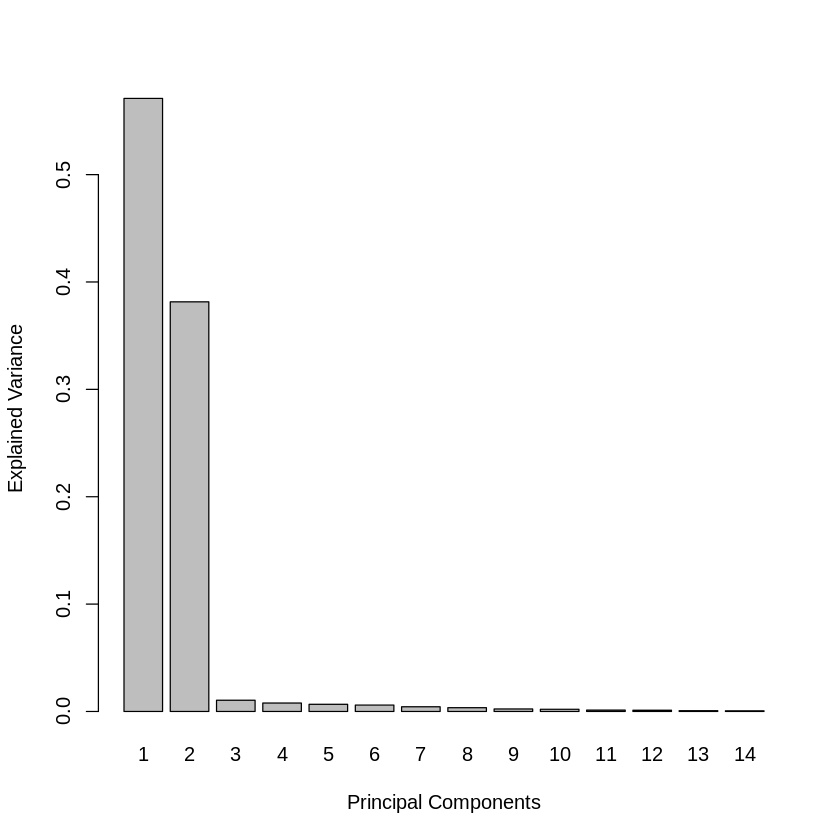

In [ ]:
x<-Transcriptomics_Stems
tune_pca_Transcriptomics_Stems<- tune.pca(x, ncomp = 14, scale = TRUE)
plot(tune_pca_Transcriptomics_Stems)
print(tune_pca_Transcriptomics_Stems$cum.var)

we observe that the first two principal components explain 86% of the total variance, The rule of thumb for choosing the number of components is not so much to set a hard threshold based on the cumulative proportion of explained variance thus taking 2 comp is enough for our final pca

In [ ]:
# from above we see that cmp1 and cmp2 cmp3 are teh biggest variation of the total variance gence we only use those
final_pca_Transcriptomics_Stems<- pca(x, ncomp = 2, center = TRUE, scale = TRUE)
#final_pca_Metabo_stm  # Lists possible outputs
print(final_pca_Transcriptomics_Stems$var.tot)
print(final_pca_Transcriptomics_Stems$prop_expl_var$X)

[1] 17
      PC1       PC2 
0.5709805 0.3815192 


Identify the informative variables

Top variables on the first component only:

Here the variables are not selected (all are included), but ranked according to their importance in defining each component.

In [ ]:
#idnetifying the informative variables
# Top variables on the first component only:
head(selectVar(final_pca_Transcriptomics_Stems, comp = 1)$value)

,value.var
,<dbl>
AT3G43980,-0.3032850
AT1G47640,-0.3010472
AT1G47820,-0.2992374
AT1G34418,-0.2970232
AT5G41950,0.2752335
AT4G06748,-0.2717019


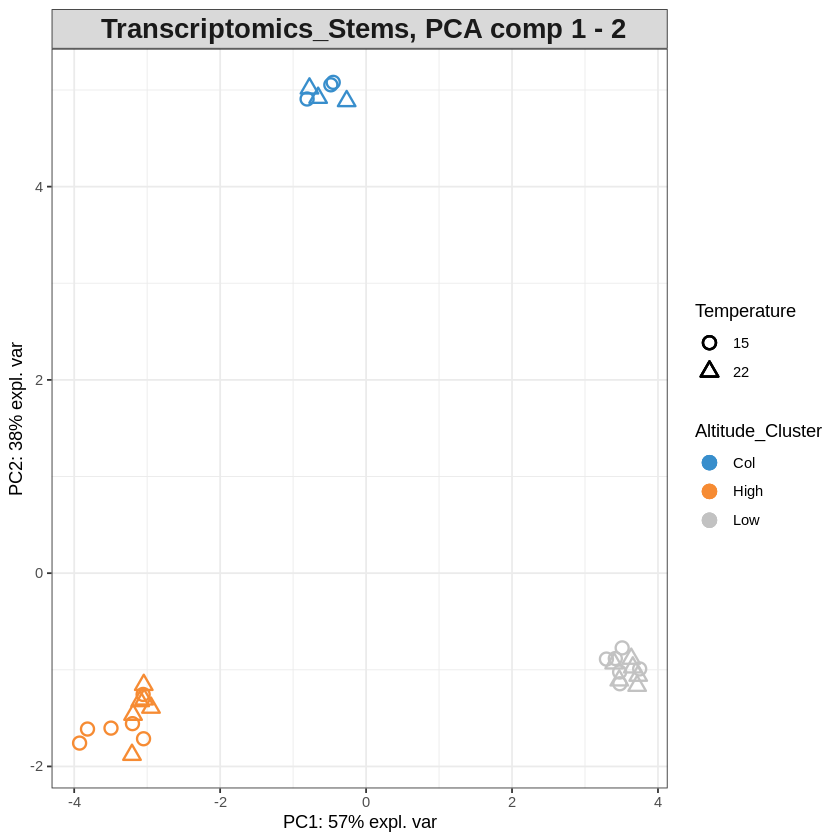

In [ ]:
#sample plots
plotIndiv(final_pca_Transcriptomics_Stems,
          comp = c(1, 2),   # Specify components to plot
          ind.names = TRUE, # Show row names of samples
          group=Altitude_Cluster,
          pch=Temperature,
          title = ' Transcriptomics_Stems, PCA comp 1 - 2',
          legend = TRUE, 
          legend.title = 'Altitude_Cluster',
          legend.title.pch = 'Temperature')

Transcriptomics rosette Samples are projected into the space spanned by the first two principal components, and coloured according to allttude cluster and shapes according to temperature we can see clearly the clustering based upon the ecotype

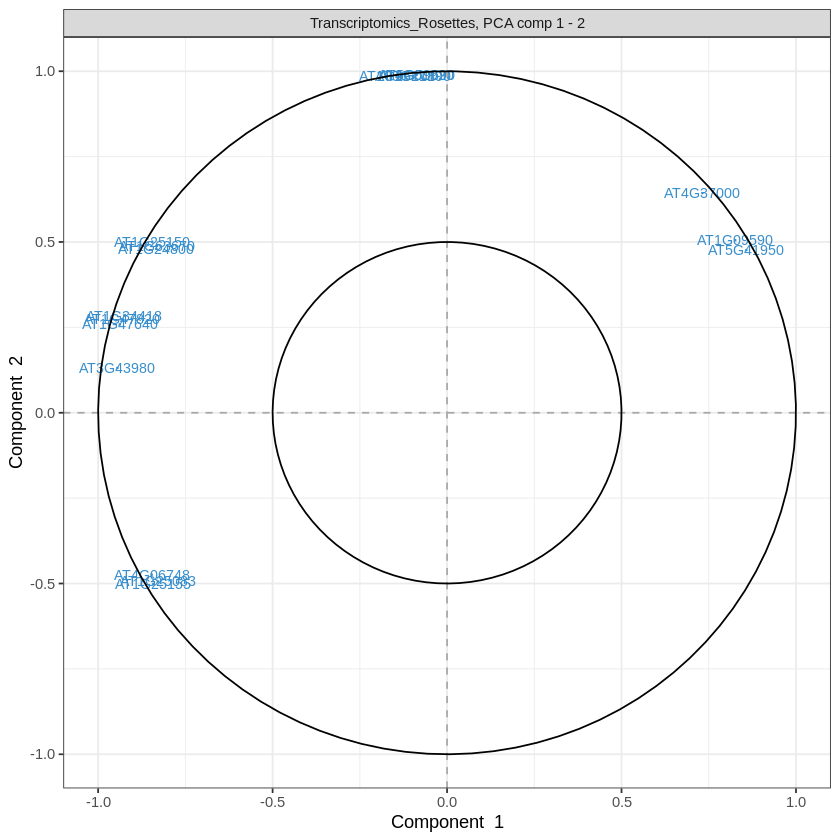

In [ ]:
#variable plot /correlation plot
plotVar(final_pca_Transcriptomics_Stems, comp = c(1, 2),
        var.names = TRUE,
        cex = 3,         # To change the font size
       #cutoff = 0.3,  # For further cutoff
        title = 'Transcriptomics_Rosettes, PCA comp 1 - 2')

Correlation Circle plot from the PCA performed on the phenomics data. The plot shows variable that contribute to PCs and how they contribute
 

Warning message:
“ggrepel: 19 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


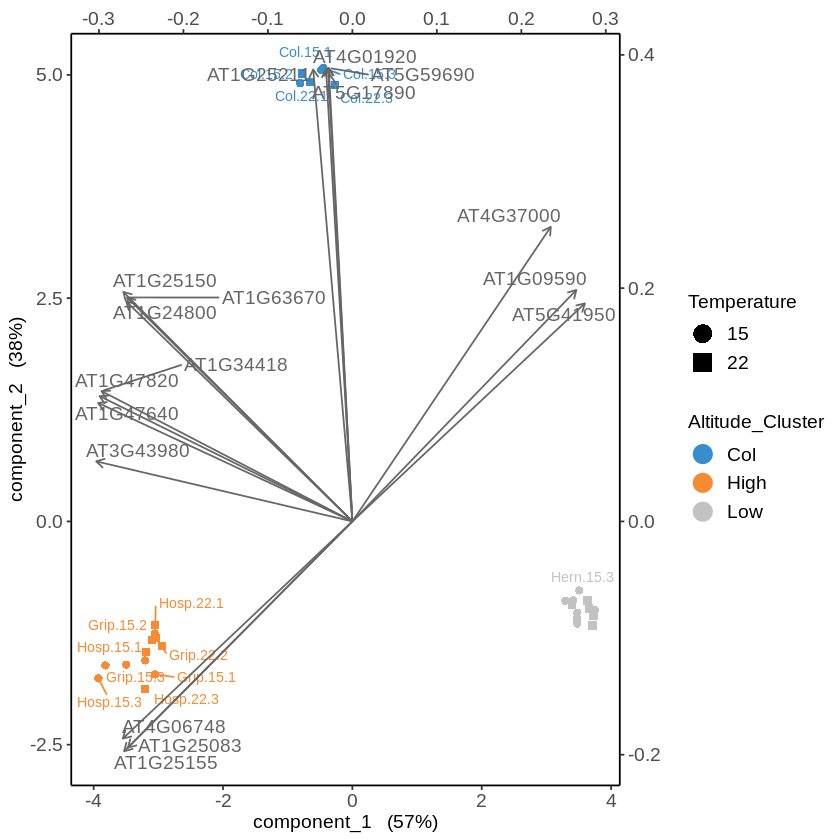

In [ ]:
#Biplot samples and variables 
biplot(final_pca_Transcriptomics_Stems,
        group = Altitude_Cluster ,
        pch = Temperature, 
       legend.title = 'Altitude_Cluster',
       legend.title.pch="Temperatue")

This plot can indicate what variables are responsible for explaining distibution in the sample values. A variable vector that points towards a set of certain points can provide information on what caused the clustering of those points. every sub group of transcriptomics point to a sub cluster of samples we can say variables  (transcriptomics) defines the clustering of samples based on temperature and alltitude clustering 

**Transcriptomics_Stems_CW:**

      PC1       PC2       PC3       PC4       PC5       PC6       PC7       PC8 
0.4266925 0.7449728 0.8424569 0.9048213 0.9407470 0.9651412 0.9797803 0.9891205 
      PC9      PC10 
0.9937283 0.9969885 


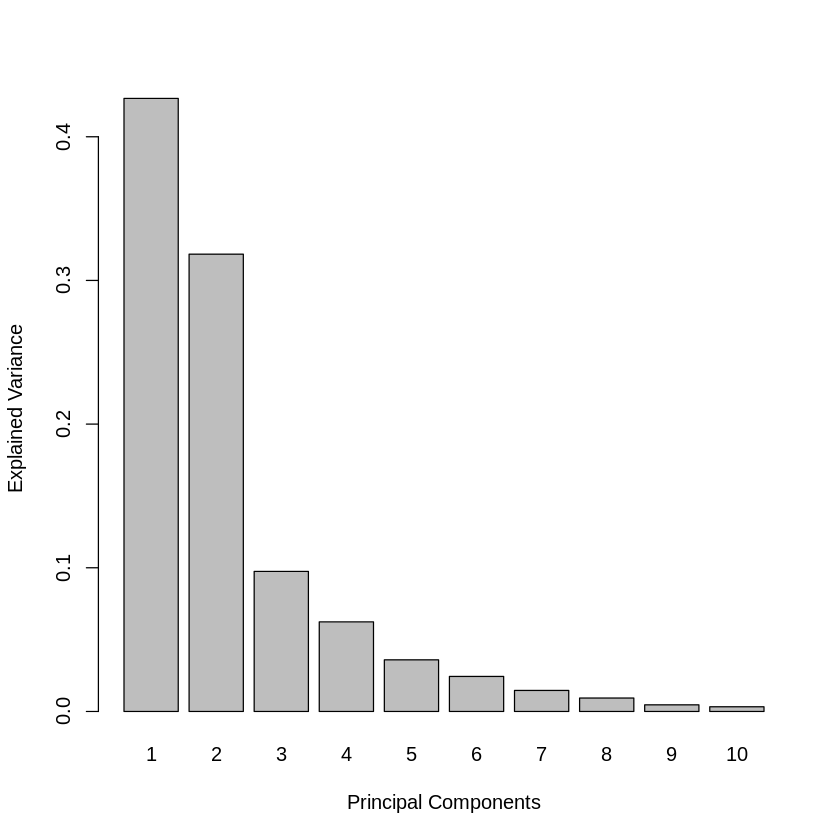

In [ ]:
x<-Transcriptomics_Stems_CW
tune_pca_Transcriptomics_Stems_CW<- tune.pca(x, ncomp = 10, scale = TRUE)
plot(tune_pca_Transcriptomics_Stems_CW)
print(tune_pca_Transcriptomics_Stems_CW$cum.var)

we observe that the first two principal components explain 86% of the total variance, The rule of thumb for choosing the number of components is not so much to set a hard threshold based on the cumulative proportion of explained variance thus taking 2 comp is enough for our final pca

In [ ]:
# from above we see that cmp1 and cmp2 cmp3 are teh biggest variation of the total variance gence we only use those
final_pca_Transcriptomics_Stems_CW<- pca(x, ncomp = 2, center = TRUE, scale = TRUE)
#final_pca_Metabo_stm  # Lists possible outputs
print(final_pca_Transcriptomics_Stems_CW$var.tot)
print(final_pca_Transcriptomics_Stems_CW$prop_expl_var$X)

[1] 11
      PC1       PC2 
0.4266925 0.3182803 


Identify the informative variables

Top variables on the first component only:

Here the variables are not selected (all are included), but ranked according to their importance in defining each component.

In [ ]:
#idnetifying the informative variables
# Top variables on the first component only:
head(selectVar(final_pca_Transcriptomics_Stems_CW, comp = 1)$value)

,value.var
,<dbl>
AT5G47550,-0.4183934
AT1G17860,-0.3639550
AT3G57260,-0.3592263
AT5G42100,0.3573916
AT3G14210,-0.3550450
AT4G20430,-0.3057100


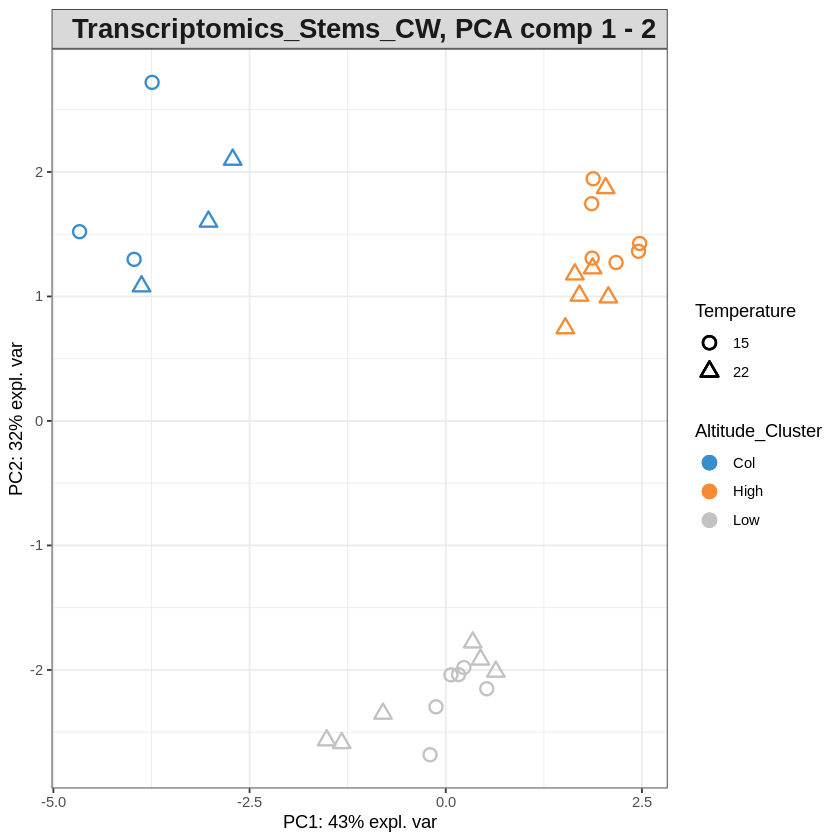

In [ ]:
#sample plots
plotIndiv(final_pca_Transcriptomics_Stems_CW,
          comp = c(1, 2),   # Specify components to plot
          ind.names = TRUE, # Show row names of samples
          group=Altitude_Cluster,
          pch=Temperature,
          title = ' Transcriptomics_Stems_CW, PCA comp 1 - 2',
          legend = TRUE, 
          legend.title = 'Altitude_Cluster',
          legend.title.pch = 'Temperature')

Transcriptomics rosette Samples are projected into the space spanned by the first two principal components, and coloured according to allttude cluster and shapes according to temperature we can see clearly the clustering based upon the ecotype

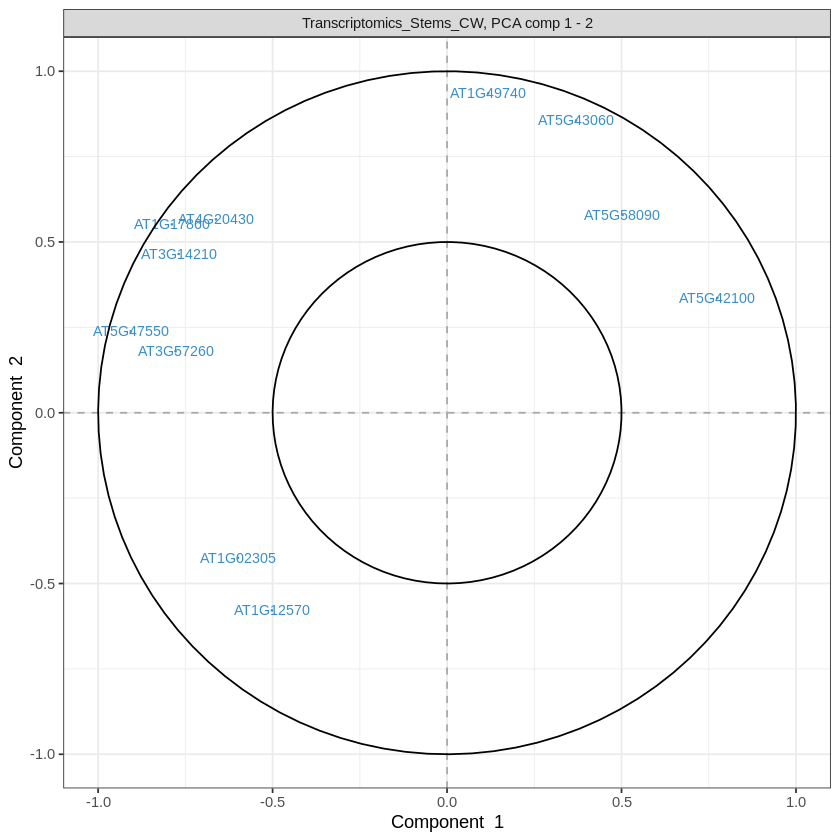

In [ ]:
#variable plot /correlation plot
plotVar(final_pca_Transcriptomics_Stems_CW, comp = c(1, 2),
        var.names = TRUE,
        cex = 3,         # To change the font size
       #cutoff = 0.3,  # For further cutoff
        title = 'Transcriptomics_Stems_CW, PCA comp 1 - 2')

Correlation Circle plot from the PCA performed on the phenomics data. The plot shows variable that contribute to PCs and how they contribute
 

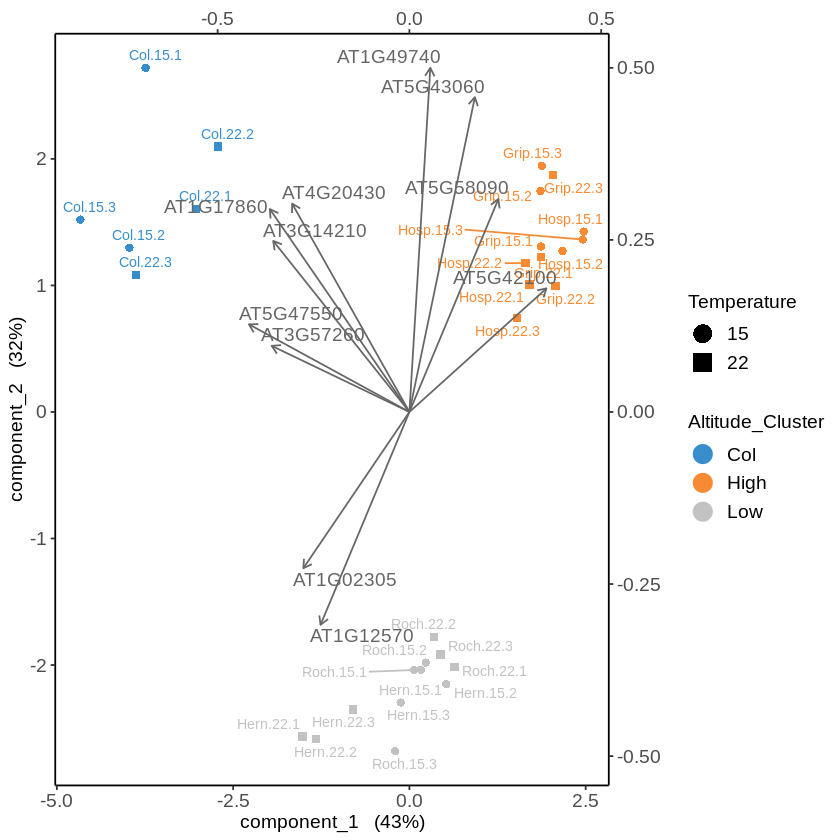

In [ ]:
#Biplot samples and variables 
biplot(final_pca_Transcriptomics_Stems_CW,
        group = Altitude_Cluster ,
        pch = Temperature, 
       legend.title = 'Altitude_Cluster',
       legend.title.pch="Temperatue")

This plot can indicate what variables are responsible for explaining distibution in the sample values. A variable vector that points towards a set of certain points can provide information on what caused the clustering of those points. every sub group of transcriptomics point to a sub cluster of samples we can say variables  (transcriptomics) defines the clustering of samples based on temperature and alltitude clustering 